<a href="https://colab.research.google.com/github/Ram060299/Heart-Sound-Processing-via-xLSTM/blob/main/Healthy_VAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

# Try unmounting the drive first
try:
  drive.flush_and_unmount()
  print("Drive unmounted")
except ValueError:
  pass

# Now mount the drive
drive.mount('/content/drive', force_remount=True)

import zipfile
import os

zip_path = '/content/drive/MyDrive/healthy VAL.zip'
extract_path = '/content/drive/MyDrive/healthy VAL_extracted'

# Extract the zip file
if not os.path.exists(extract_path):
    os.makedirs(extract_path)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Files extracted to: {extract_path}")


Drive unmounted
Mounted at /content/drive
Files extracted to: /content/drive/MyDrive/healthy VAL_extracted


In [ ]:
audio_files = []
for root, dirs, files in os.walk(extract_path):
    for file in files:
        if file.endswith('.wav'):
            audio_files.append(os.path.join(root, file))

print(f"Found {len(audio_files)} audio files.")


Found 150 audio files.


In [ ]:
!pip install noisereduce
import librosa
import soundfile as sf
import numpy as np
import librosa.display
import noisereduce as nr # The noisereduce module is now imported
import matplotlib.pyplot as plt
import os

def preprocess_audio(file_path, output_folder):
    # 1. Load and convert audio to 16kHz
    y, sr = librosa.load(file_path, sr=16000)

    # 2. Trim silence
    y_trimmed, _ = librosa.effects.trim(y)

    # 3. Handle corrupted files (log error and skip)
    try:
        y, sr = librosa.load(file_path)
    except Exception as e:
        print(f"Error loading file {file_path}: {e}")
        return  # Skip the file if there’s an error

    # 4. Remove outliers based on amplitude
    threshold = np.mean(np.abs(y_trimmed)) + 3 * np.std(np.abs(y_trimmed))
    y_no_outliers = y_trimmed[np.abs(y_trimmed) < threshold]

    # 5. Convert stereo to mono
    y_mono = librosa.to_mono(y_no_outliers)

    # 6. Fix duration to 10 seconds
    max_duration = 10.0
    y_fixed_length = librosa.util.fix_length(y_mono, size=int(sr * max_duration))

    # 7. Optional: Plot waveform
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(y_fixed_length, sr=sr)
    plt.title(f'Waveform of {os.path.basename(file_path)}')
    plt.show()

    # 8. Normalize
    y_normalized = librosa.util.normalize(y_fixed_length)

    # 9. Noise reduction
    y_denoised = nr.reduce_noise(y=y_normalized, sr=sr)

    # 10. Save processed file
    output_path = os.path.join(output_folder, os.path.basename(file_path))
    sf.write(output_path, y_denoised, sr)

    print(f"Processed and saved: {output_path}")

Processing file 1/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/a0007.wav


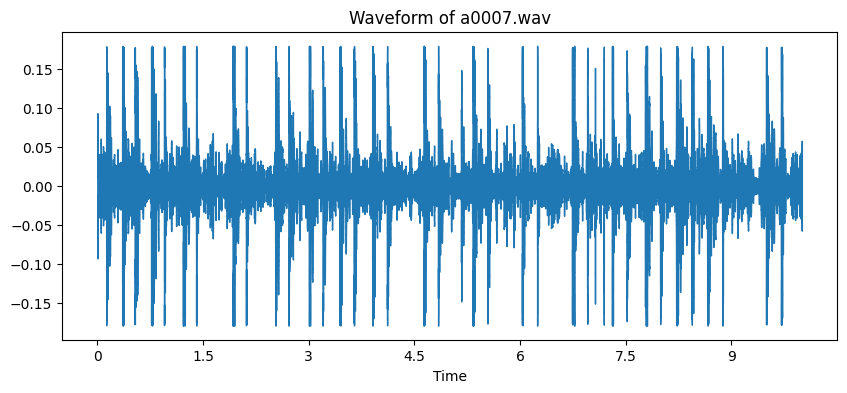

Processed and saved: /content/drive/MyDrive/processed_audio/a0007.wav
Processing file 2/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/a0009.wav


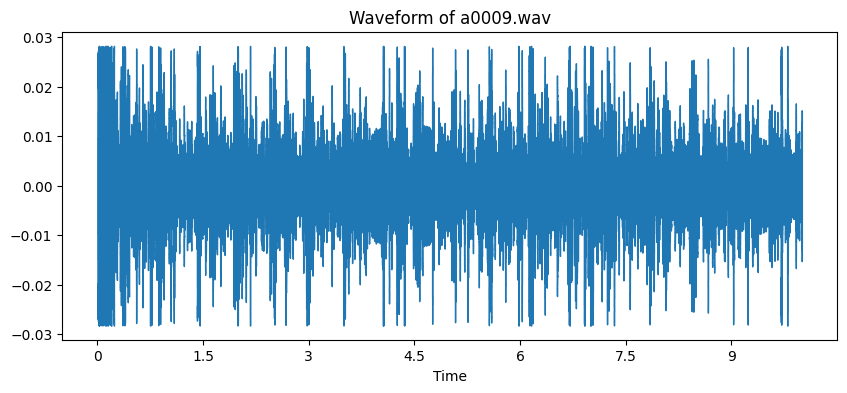

Processed and saved: /content/drive/MyDrive/processed_audio/a0009.wav
Processing file 3/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/a0011.wav


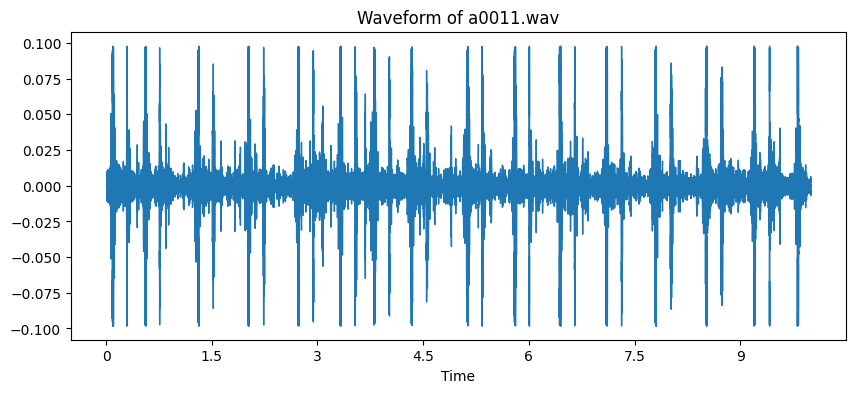

Processed and saved: /content/drive/MyDrive/processed_audio/a0011.wav
Processing file 4/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/a0012.wav


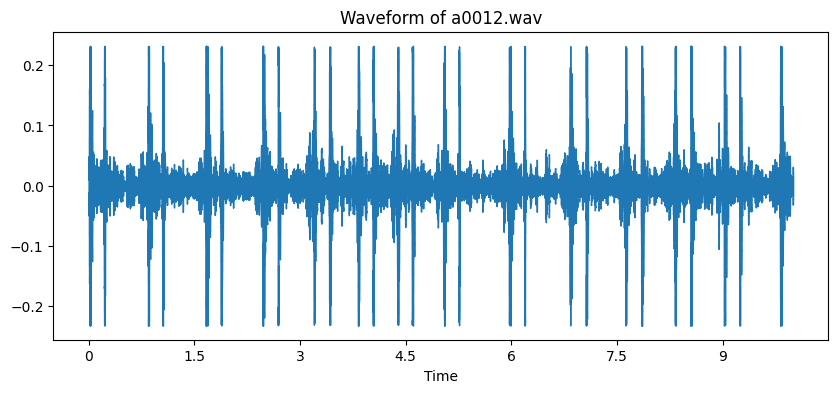

Processed and saved: /content/drive/MyDrive/processed_audio/a0012.wav
Processing file 5/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/a0016.wav


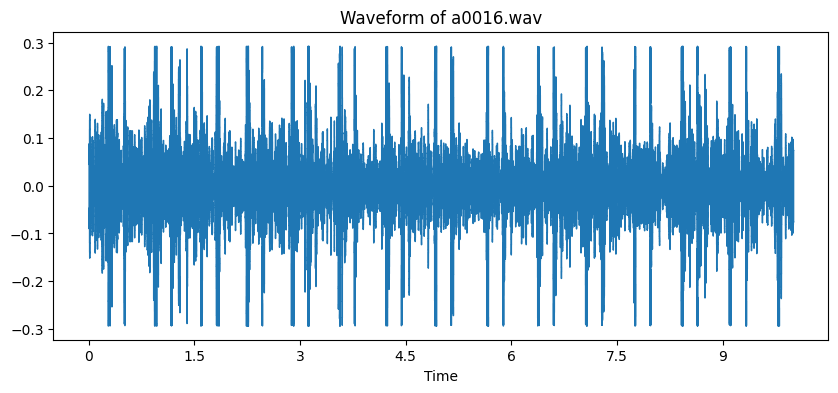

Processed and saved: /content/drive/MyDrive/processed_audio/a0016.wav
Processing file 6/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/a0019.wav


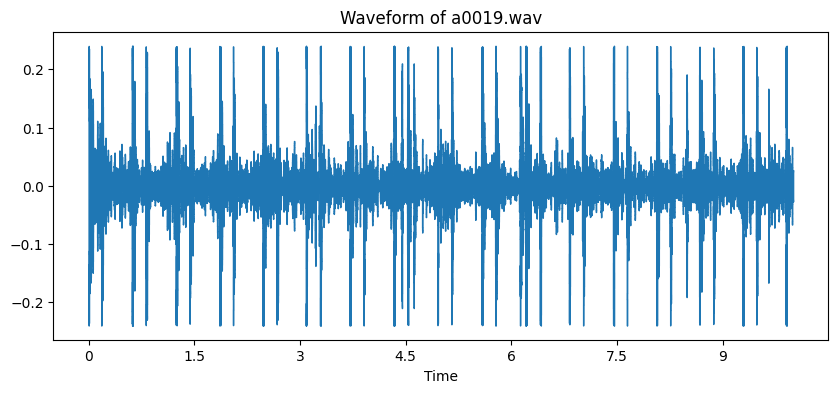

Processed and saved: /content/drive/MyDrive/processed_audio/a0019.wav
Processing file 7/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/a0025.wav


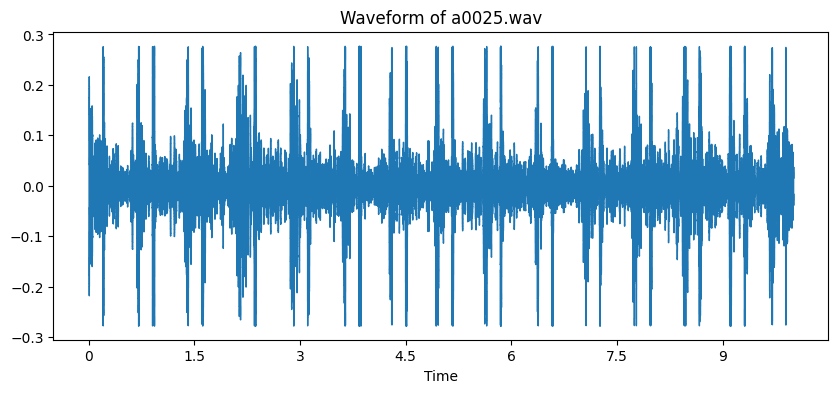

Processed and saved: /content/drive/MyDrive/processed_audio/a0025.wav
Processing file 8/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/a0027.wav


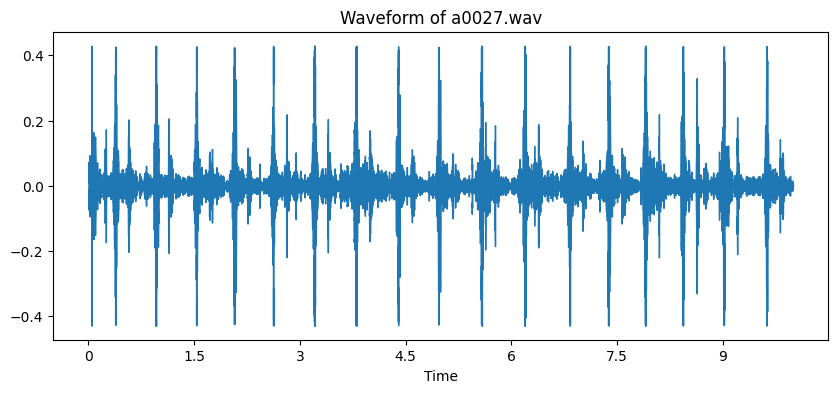

Processed and saved: /content/drive/MyDrive/processed_audio/a0027.wav
Processing file 9/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/a0028.wav


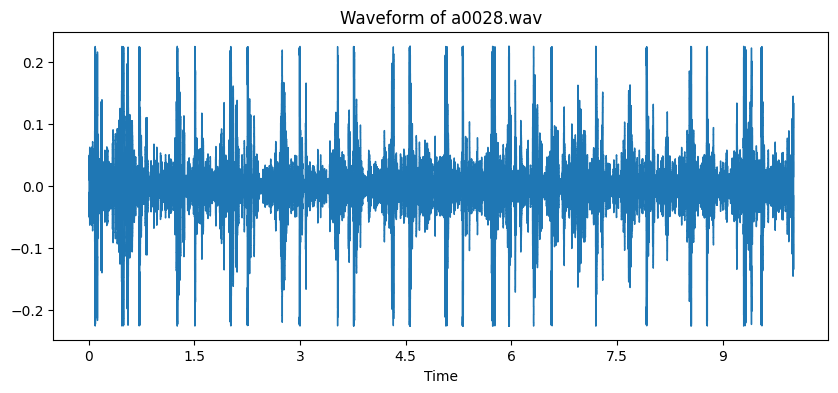

Processed and saved: /content/drive/MyDrive/processed_audio/a0028.wav
Processing file 10/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/a0029.wav


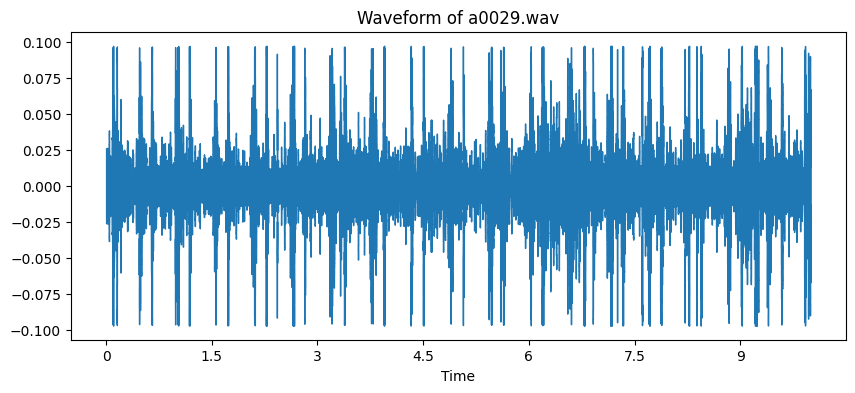

Processed and saved: /content/drive/MyDrive/processed_audio/a0029.wav
Processing file 11/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/a0032.wav


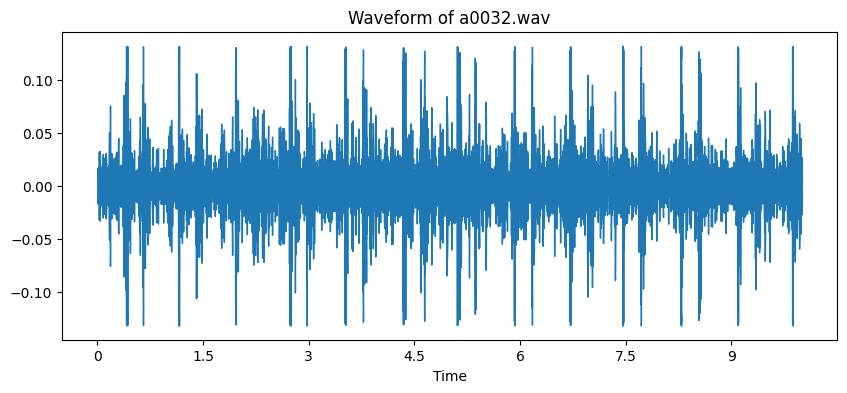

Processed and saved: /content/drive/MyDrive/processed_audio/a0032.wav
Processing file 12/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/a0035.wav


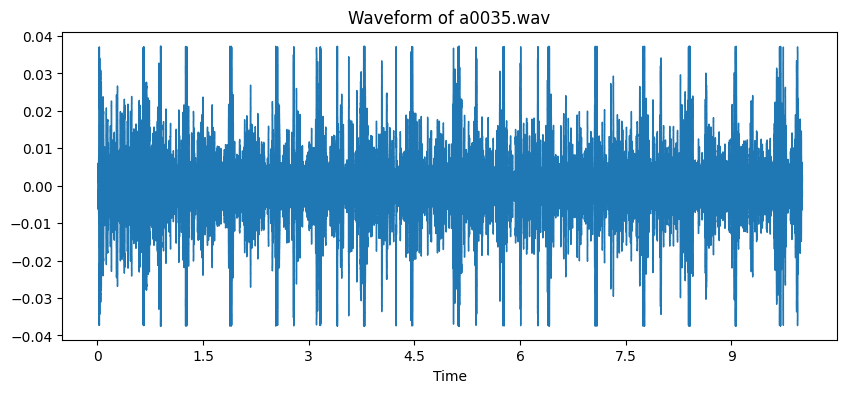

Processed and saved: /content/drive/MyDrive/processed_audio/a0035.wav
Processing file 13/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/a0038.wav


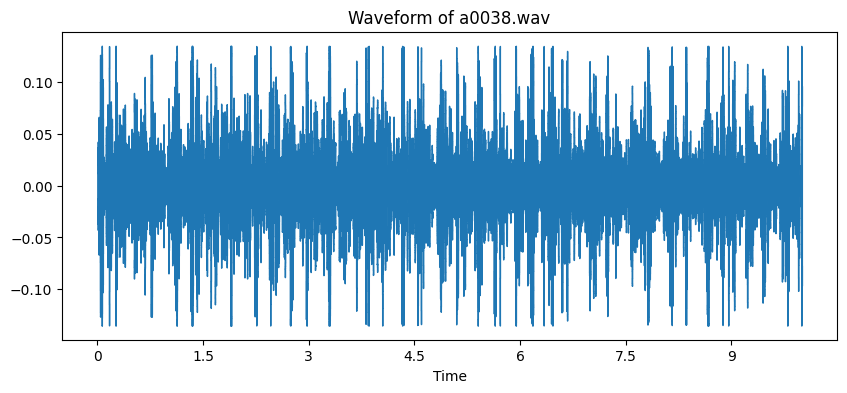

Processed and saved: /content/drive/MyDrive/processed_audio/a0038.wav
Processing file 14/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/a0049.wav


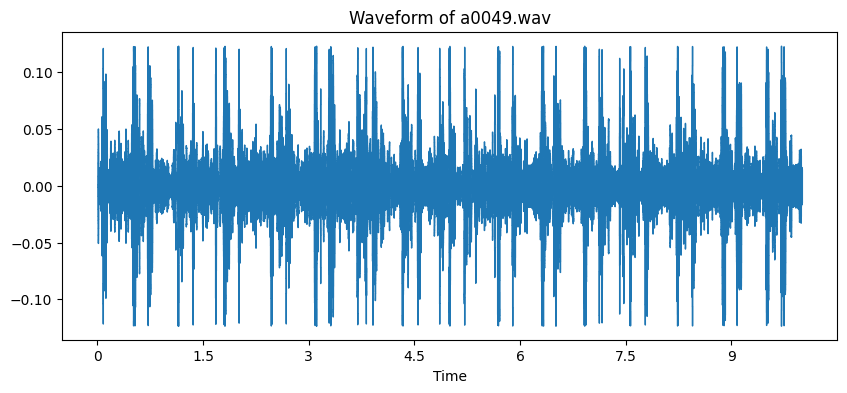

Processed and saved: /content/drive/MyDrive/processed_audio/a0049.wav
Processing file 15/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/a0050.wav


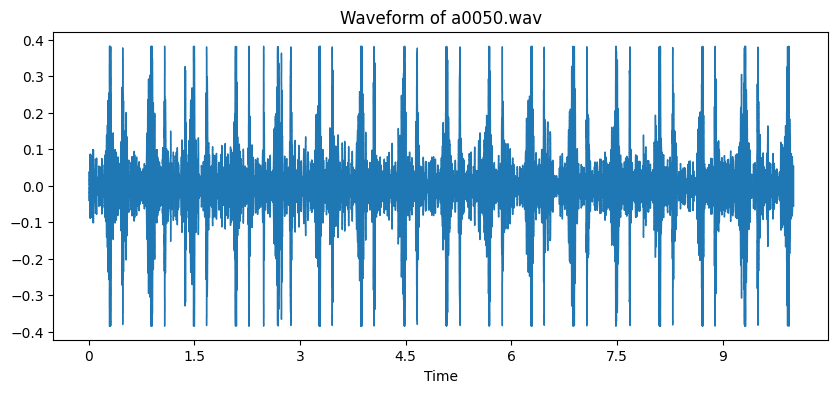

Processed and saved: /content/drive/MyDrive/processed_audio/a0050.wav
Processing file 16/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/a0053.wav


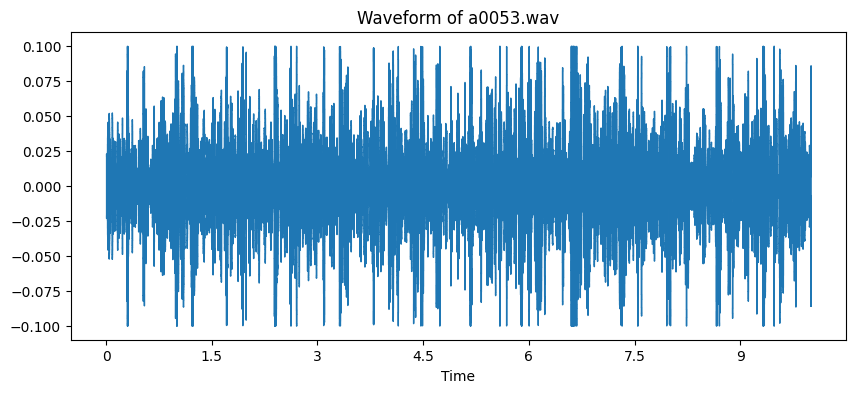

Processed and saved: /content/drive/MyDrive/processed_audio/a0053.wav
Processing file 17/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/a0055.wav


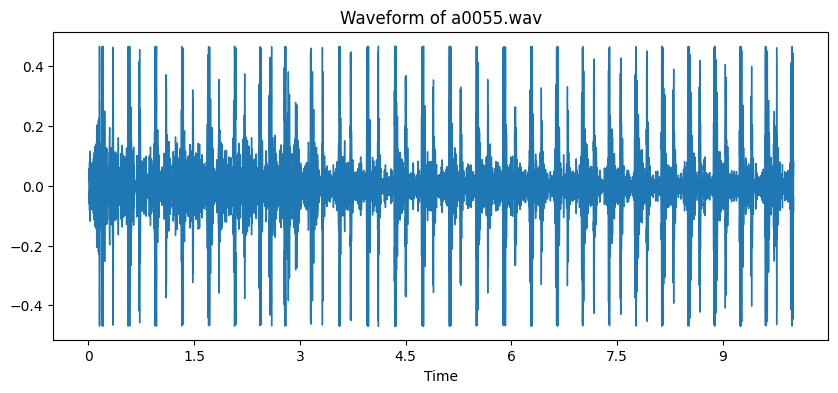

Processed and saved: /content/drive/MyDrive/processed_audio/a0055.wav
Processing file 18/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/a0068.wav


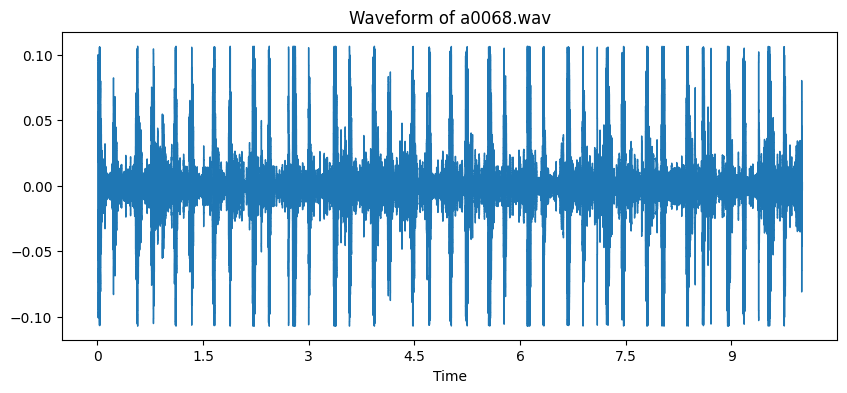

Processed and saved: /content/drive/MyDrive/processed_audio/a0068.wav
Processing file 19/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/a0069.wav


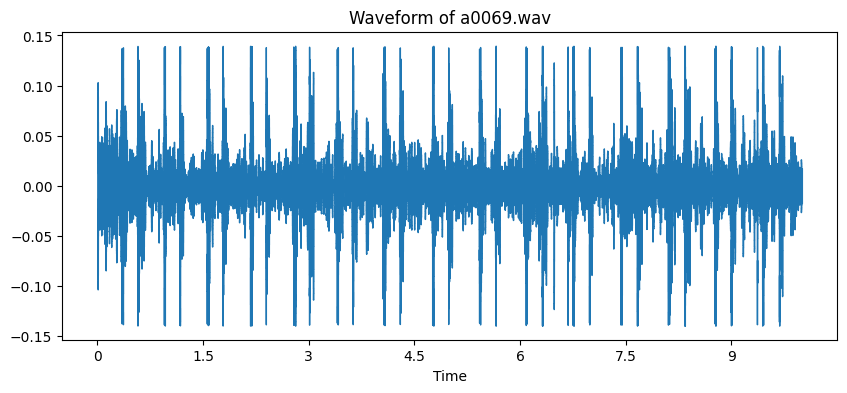

Processed and saved: /content/drive/MyDrive/processed_audio/a0069.wav
Processing file 20/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/a0070.wav


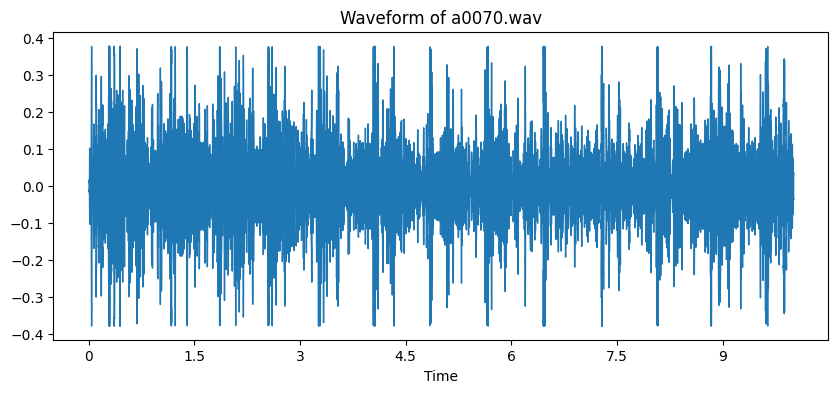

Processed and saved: /content/drive/MyDrive/processed_audio/a0070.wav
Processing file 21/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/a0071.wav


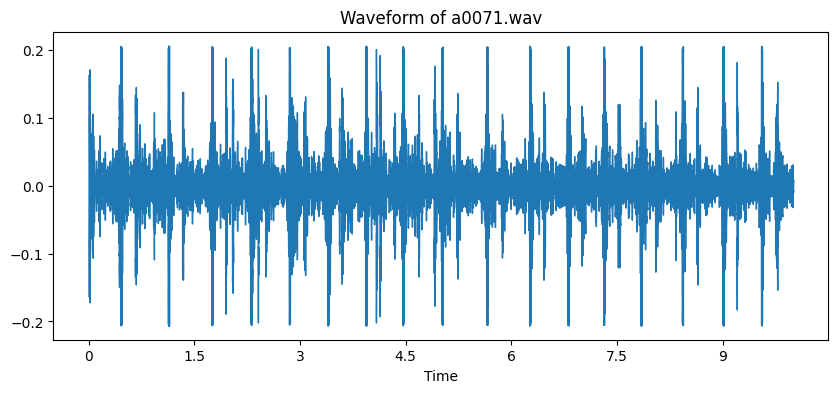

Processed and saved: /content/drive/MyDrive/processed_audio/a0071.wav
Processing file 22/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/a0080.wav


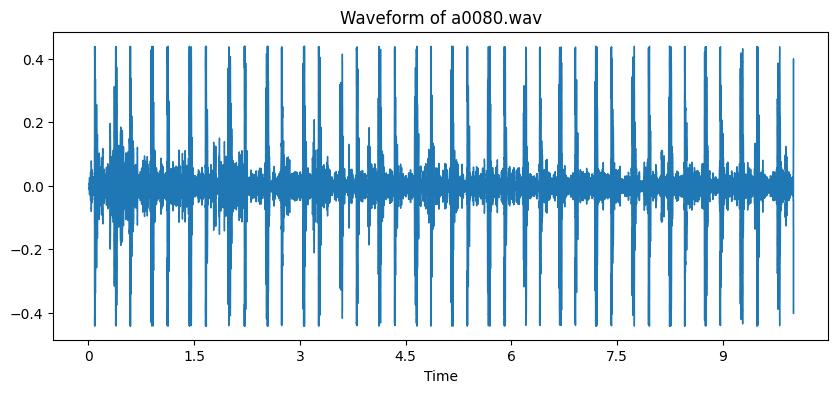

Processed and saved: /content/drive/MyDrive/processed_audio/a0080.wav
Processing file 23/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/a0081.wav


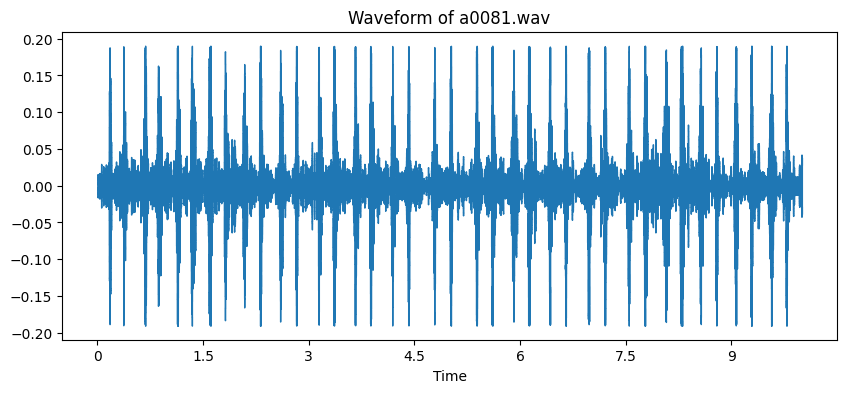

Processed and saved: /content/drive/MyDrive/processed_audio/a0081.wav
Processing file 24/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/a0085.wav


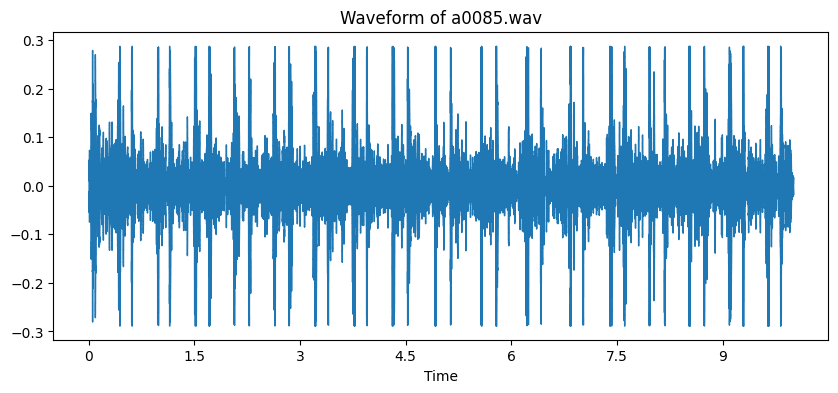

Processed and saved: /content/drive/MyDrive/processed_audio/a0085.wav
Processing file 25/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/a0086.wav


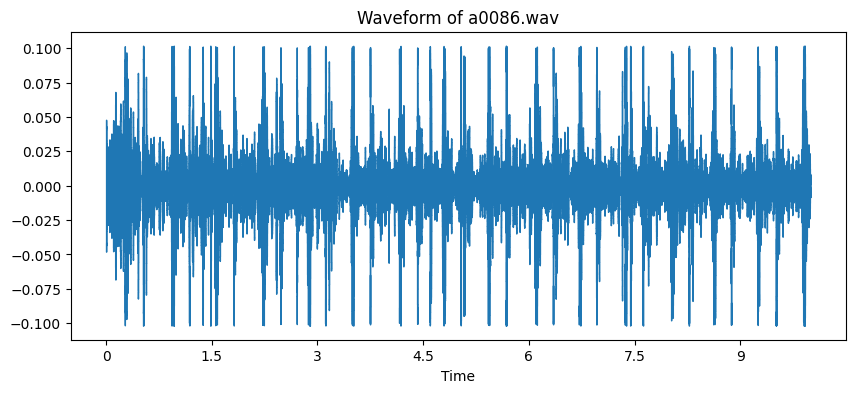

Processed and saved: /content/drive/MyDrive/processed_audio/a0086.wav
Processing file 26/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/a0088.wav


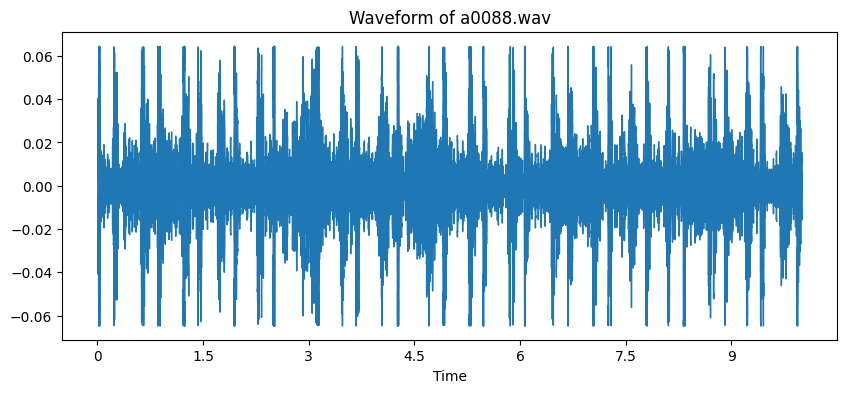

Processed and saved: /content/drive/MyDrive/processed_audio/a0088.wav
Processing file 27/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/a0091.wav


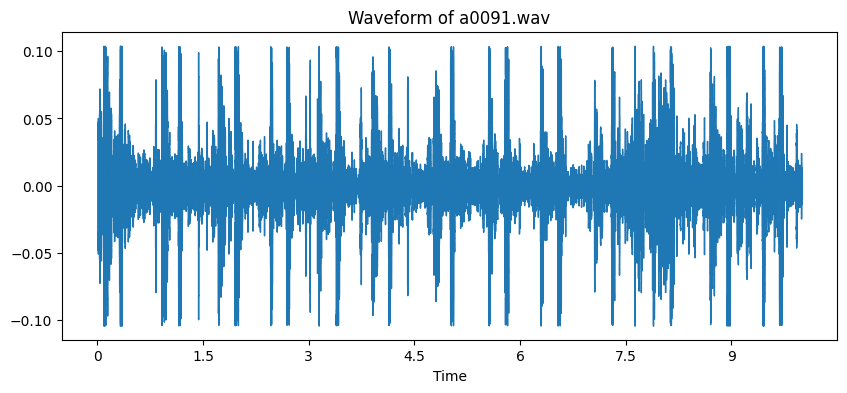

Processed and saved: /content/drive/MyDrive/processed_audio/a0091.wav
Processing file 28/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/a0093.wav


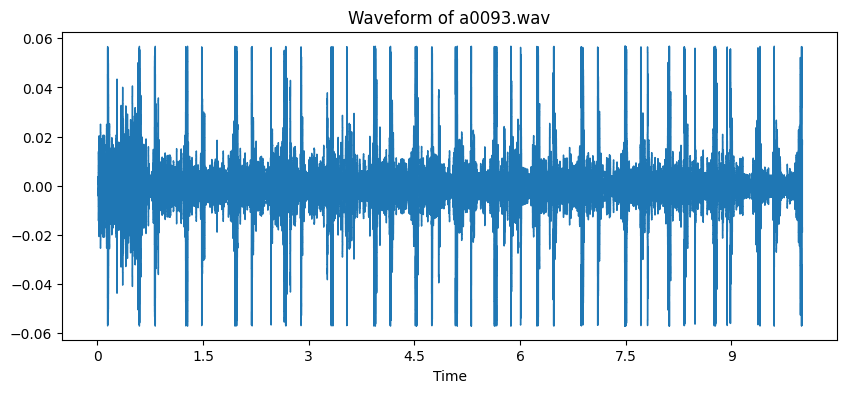

Processed and saved: /content/drive/MyDrive/processed_audio/a0093.wav
Processing file 29/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/a0094.wav


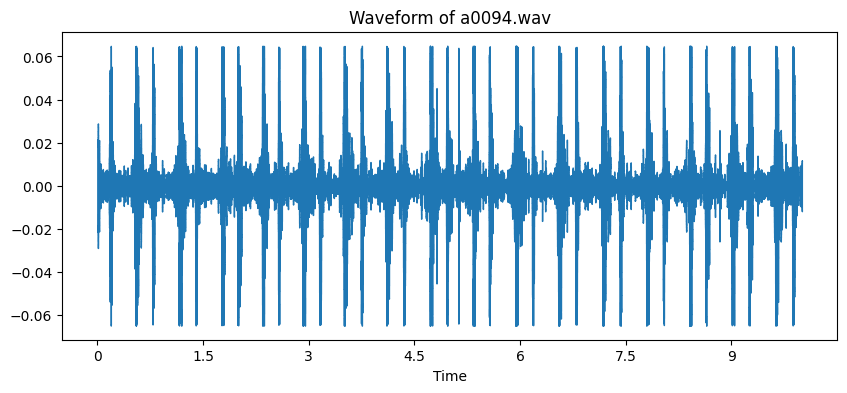

Processed and saved: /content/drive/MyDrive/processed_audio/a0094.wav
Processing file 30/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/a0102.wav


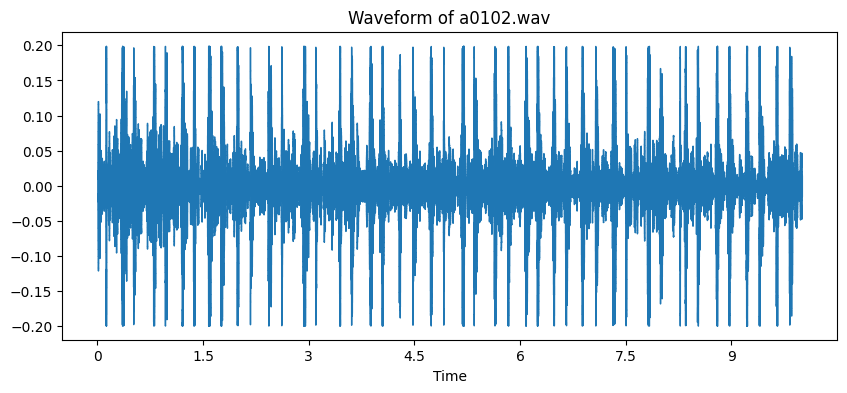

Processed and saved: /content/drive/MyDrive/processed_audio/a0102.wav
Processing file 31/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/a0105.wav


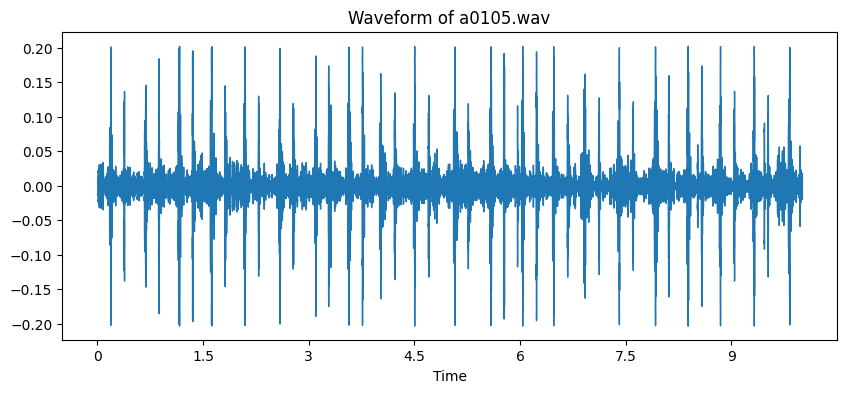

Processed and saved: /content/drive/MyDrive/processed_audio/a0105.wav
Processing file 32/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/a0106.wav


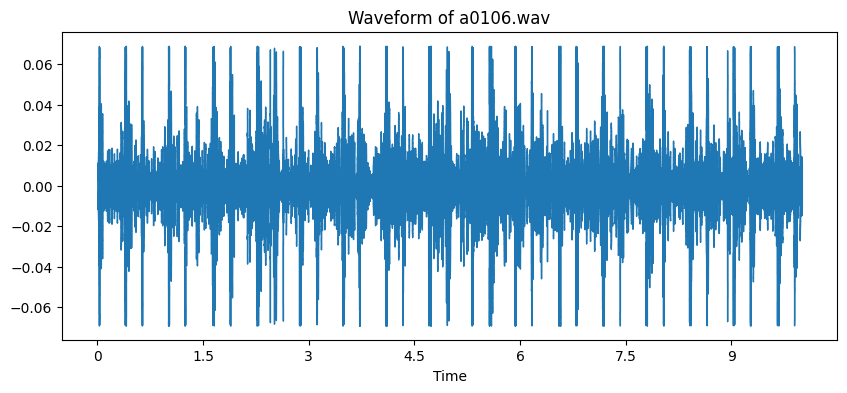

Processed and saved: /content/drive/MyDrive/processed_audio/a0106.wav
Processing file 33/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/a0108.wav


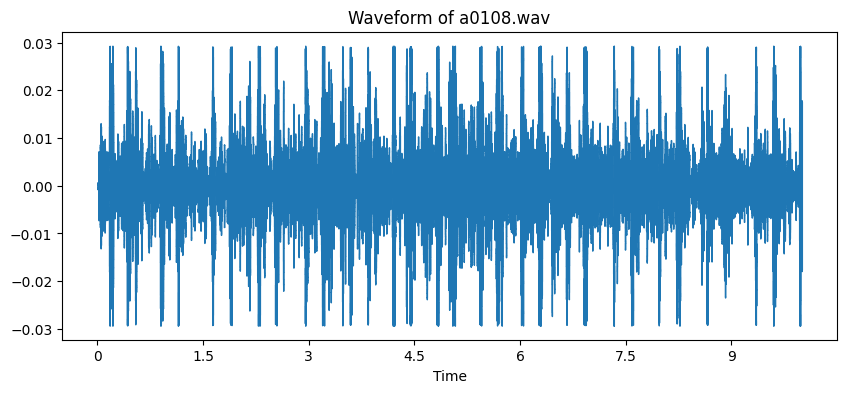

Processed and saved: /content/drive/MyDrive/processed_audio/a0108.wav
Processing file 34/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/a0109.wav


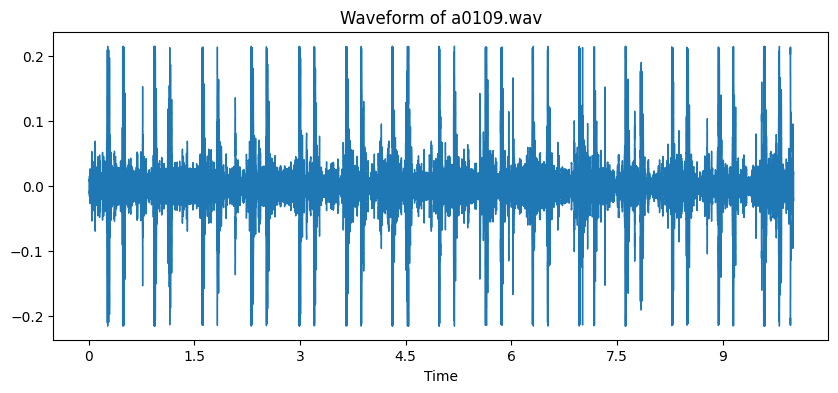

Processed and saved: /content/drive/MyDrive/processed_audio/a0109.wav
Processing file 35/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/a0118.wav


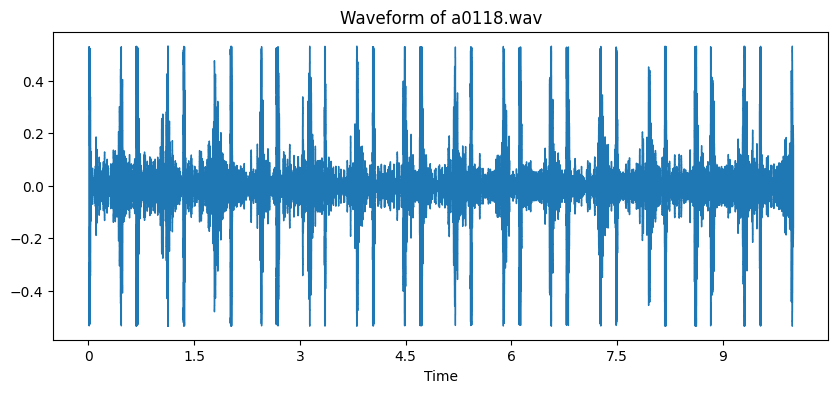

Processed and saved: /content/drive/MyDrive/processed_audio/a0118.wav
Processing file 36/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/a0125.wav


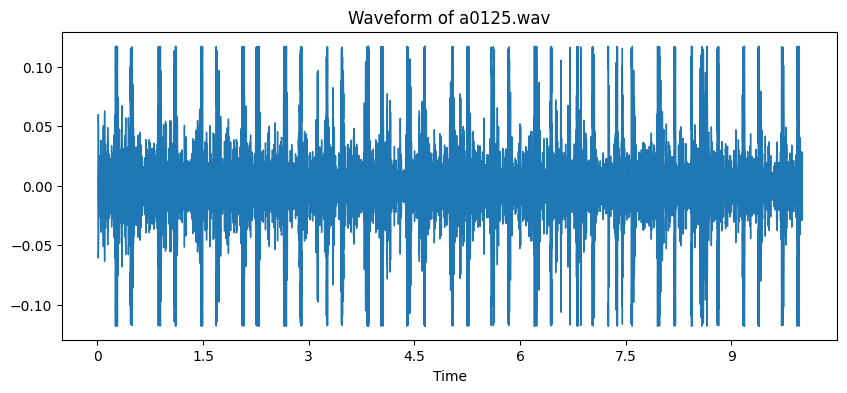

Processed and saved: /content/drive/MyDrive/processed_audio/a0125.wav
Processing file 37/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/a0127.wav


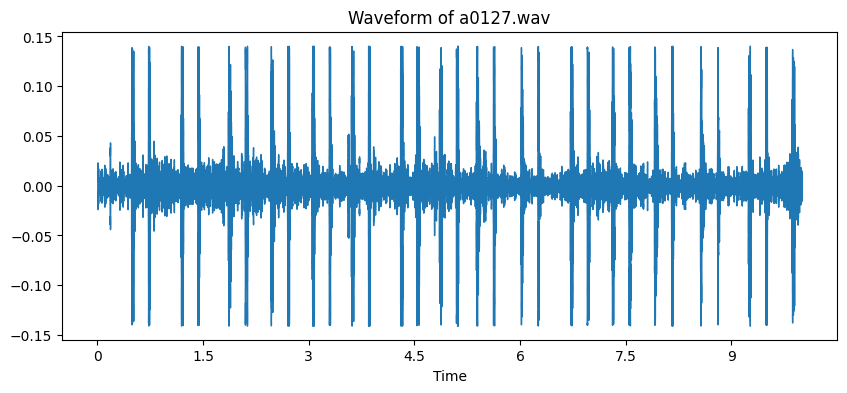

Processed and saved: /content/drive/MyDrive/processed_audio/a0127.wav
Processing file 38/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/a0129.wav


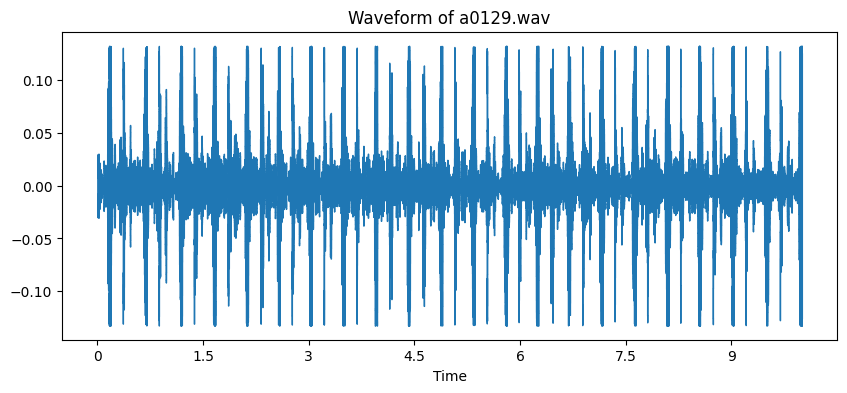

Processed and saved: /content/drive/MyDrive/processed_audio/a0129.wav
Processing file 39/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/a0136.wav


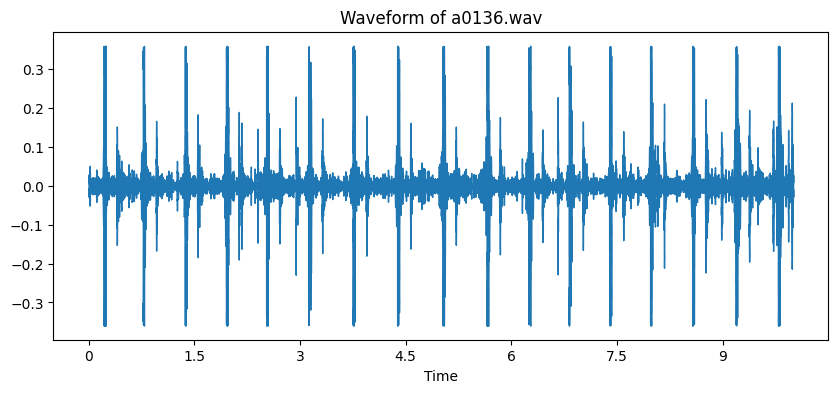

Processed and saved: /content/drive/MyDrive/processed_audio/a0136.wav
Processing file 40/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/a0139.wav


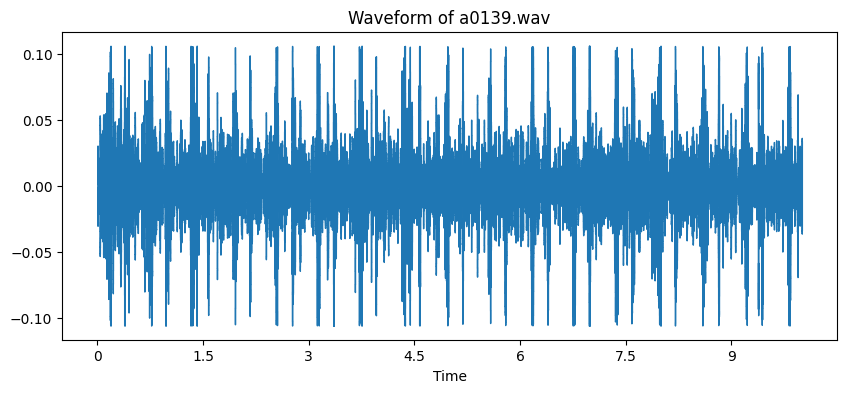

Processed and saved: /content/drive/MyDrive/processed_audio/a0139.wav
Processing file 41/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/b0001.wav


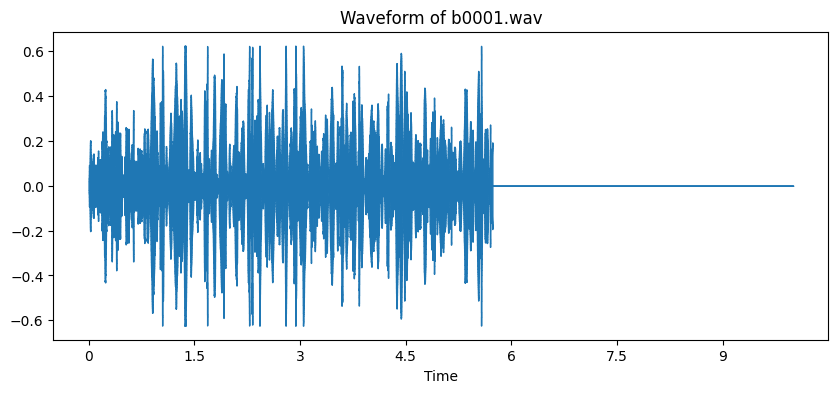

Processed and saved: /content/drive/MyDrive/processed_audio/b0001.wav
Processing file 42/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/b0002.wav


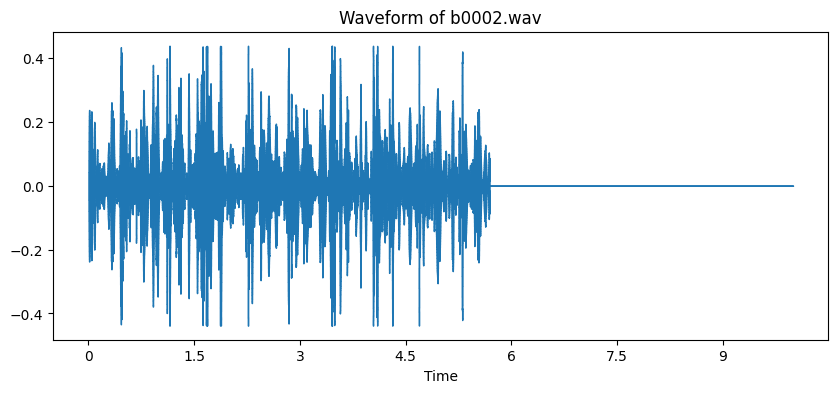

Processed and saved: /content/drive/MyDrive/processed_audio/b0002.wav
Processing file 43/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/b0003.wav


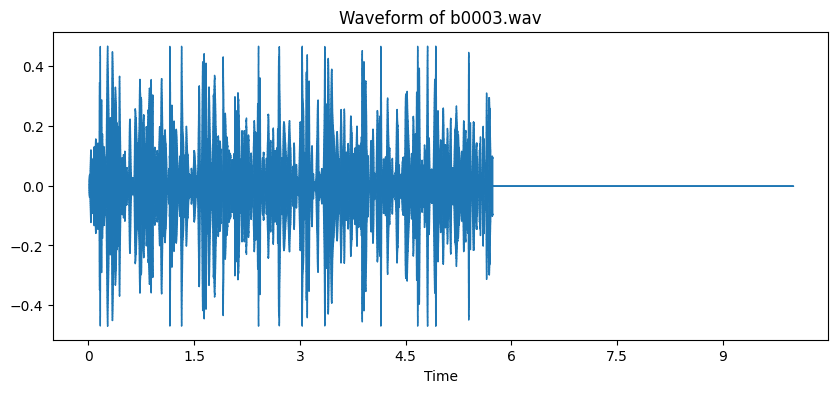

Processed and saved: /content/drive/MyDrive/processed_audio/b0003.wav
Processing file 44/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/b0004.wav


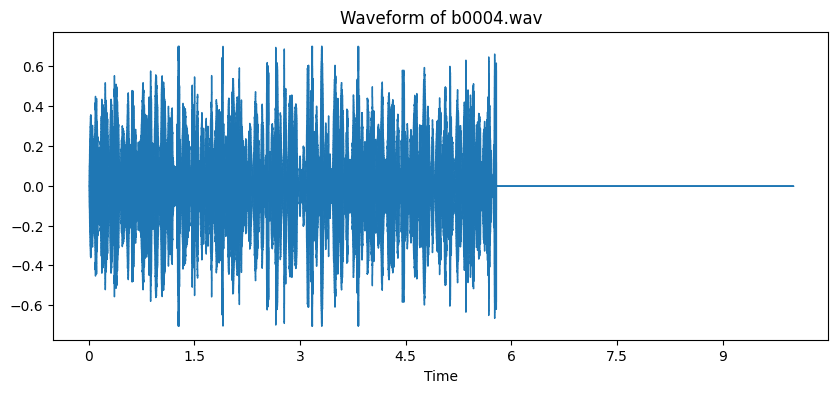

Processed and saved: /content/drive/MyDrive/processed_audio/b0004.wav
Processing file 45/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/b0005.wav


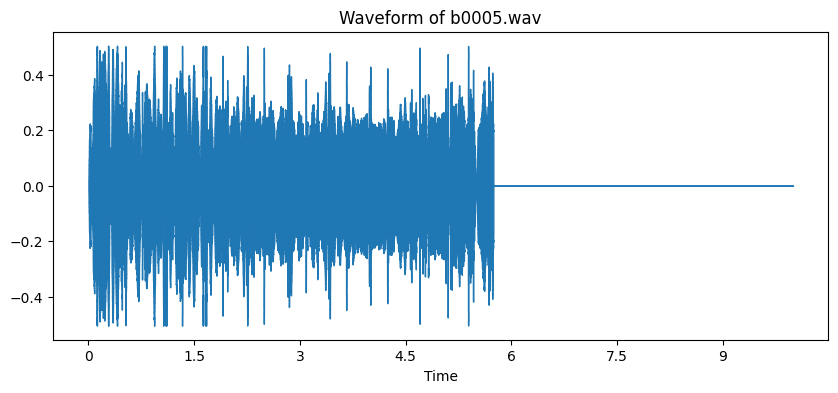

Processed and saved: /content/drive/MyDrive/processed_audio/b0005.wav
Processing file 46/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/b0006.wav


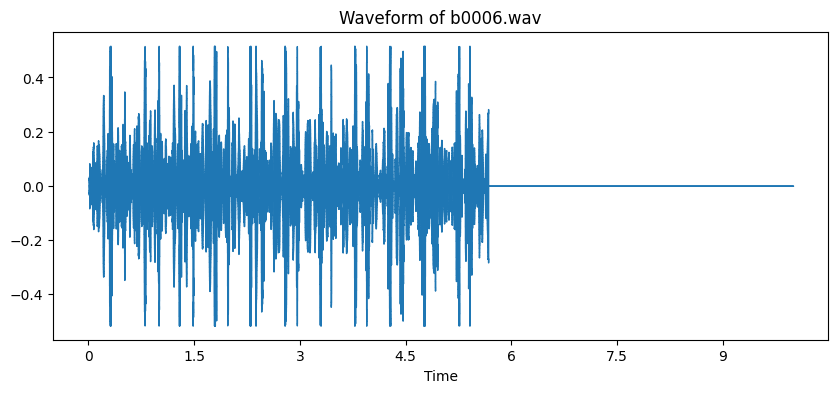

Processed and saved: /content/drive/MyDrive/processed_audio/b0006.wav
Processing file 47/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/b0007.wav


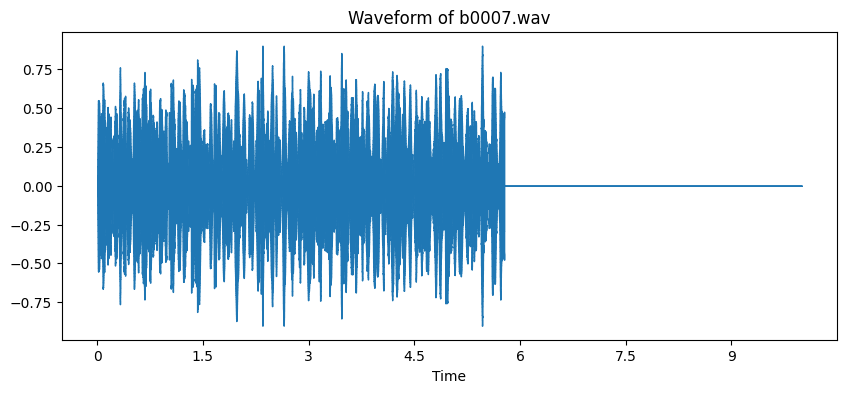

Processed and saved: /content/drive/MyDrive/processed_audio/b0007.wav
Processing file 48/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/b0009.wav


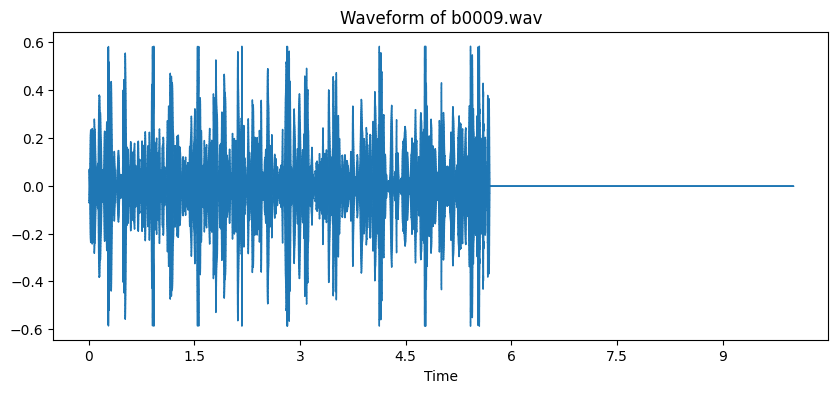

Processed and saved: /content/drive/MyDrive/processed_audio/b0009.wav
Processing file 49/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/b0010.wav


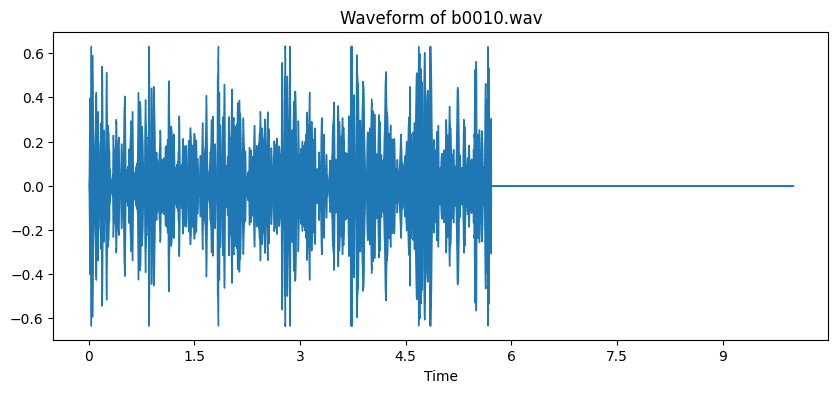

Processed and saved: /content/drive/MyDrive/processed_audio/b0010.wav
Processing file 50/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/b0011.wav


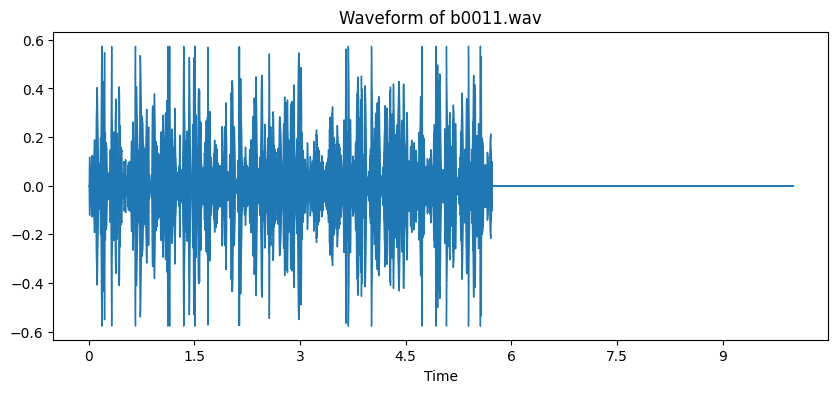

Processed and saved: /content/drive/MyDrive/processed_audio/b0011.wav
Processing file 51/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/b0012.wav


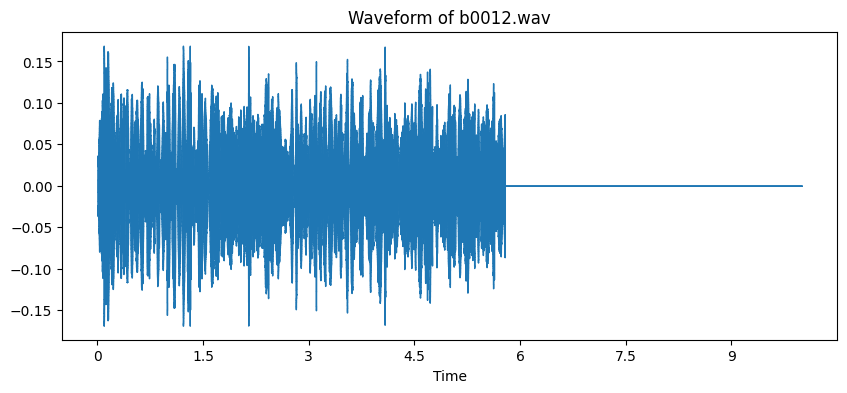

Processed and saved: /content/drive/MyDrive/processed_audio/b0012.wav
Processing file 52/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/b0014.wav


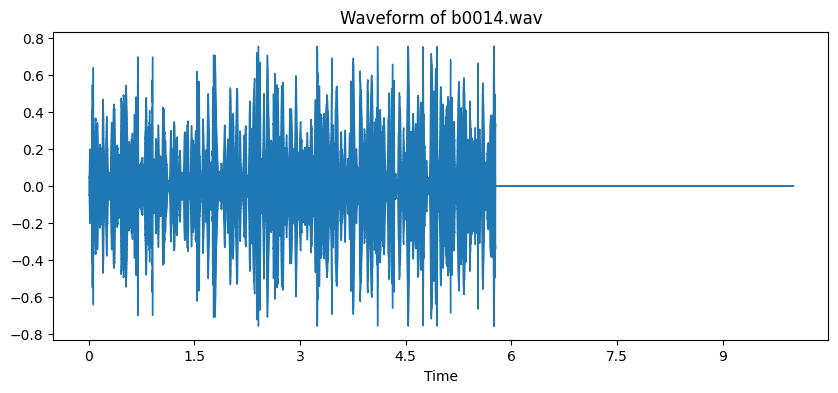

Processed and saved: /content/drive/MyDrive/processed_audio/b0014.wav
Processing file 53/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/b0015.wav


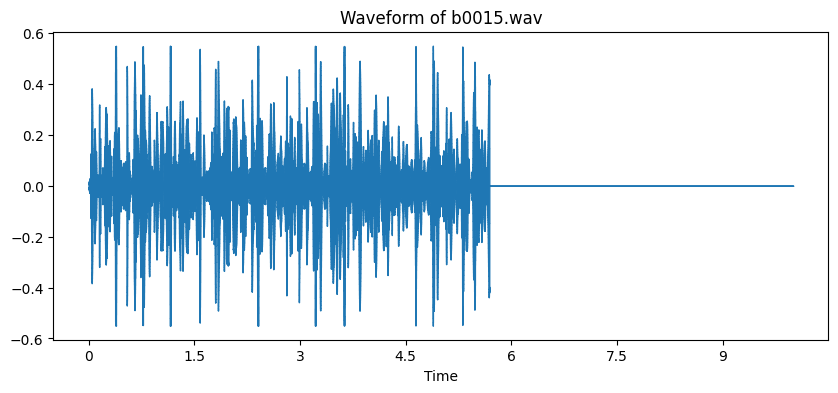

Processed and saved: /content/drive/MyDrive/processed_audio/b0015.wav
Processing file 54/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/b0017.wav


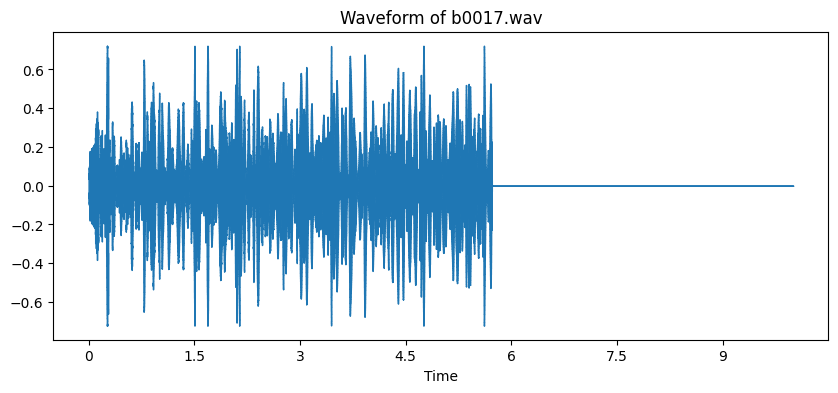

Processed and saved: /content/drive/MyDrive/processed_audio/b0017.wav
Processing file 55/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/b0019.wav


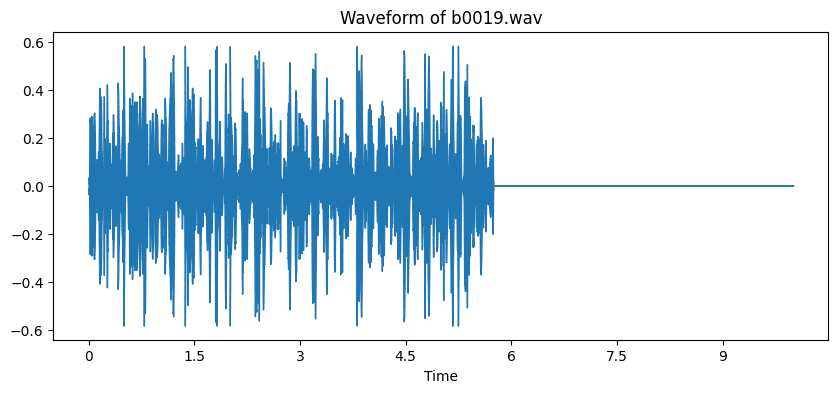

Processed and saved: /content/drive/MyDrive/processed_audio/b0019.wav
Processing file 56/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/b0020.wav


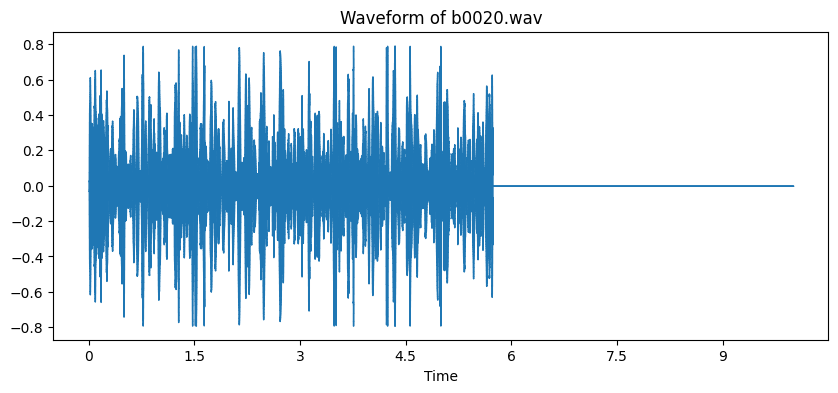

Processed and saved: /content/drive/MyDrive/processed_audio/b0020.wav
Processing file 57/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/b0021.wav


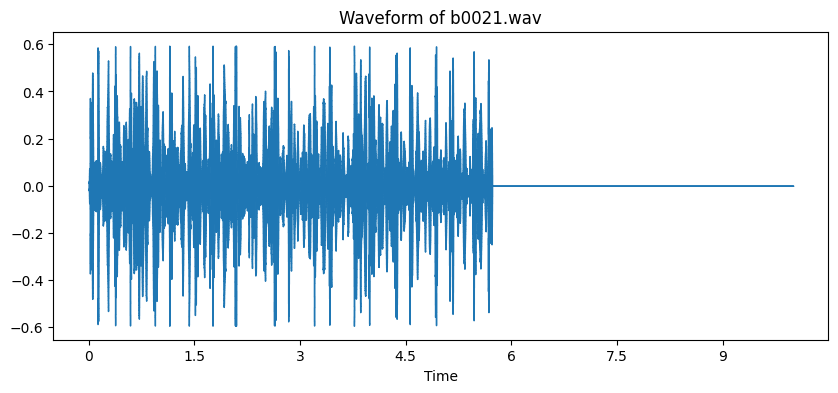

Processed and saved: /content/drive/MyDrive/processed_audio/b0021.wav
Processing file 58/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/b0024.wav


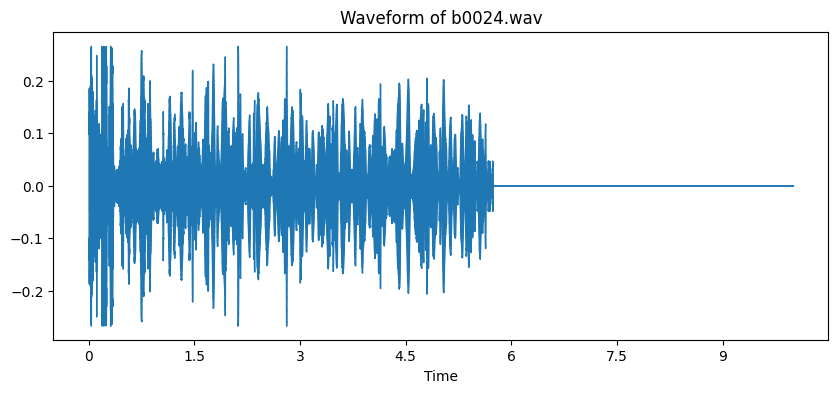

Processed and saved: /content/drive/MyDrive/processed_audio/b0024.wav
Processing file 59/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/b0025.wav


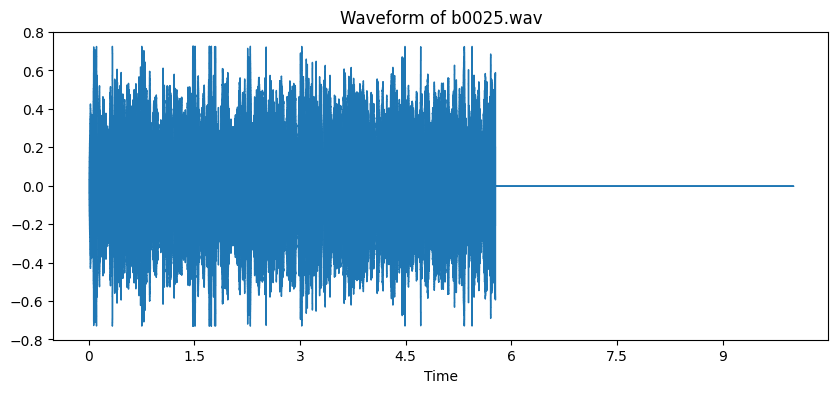

Processed and saved: /content/drive/MyDrive/processed_audio/b0025.wav
Processing file 60/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/b0026.wav


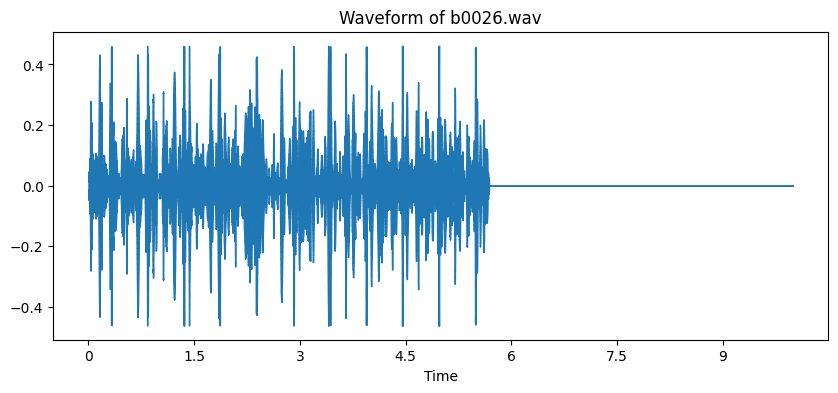

Processed and saved: /content/drive/MyDrive/processed_audio/b0026.wav
Processing file 61/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/b0027.wav


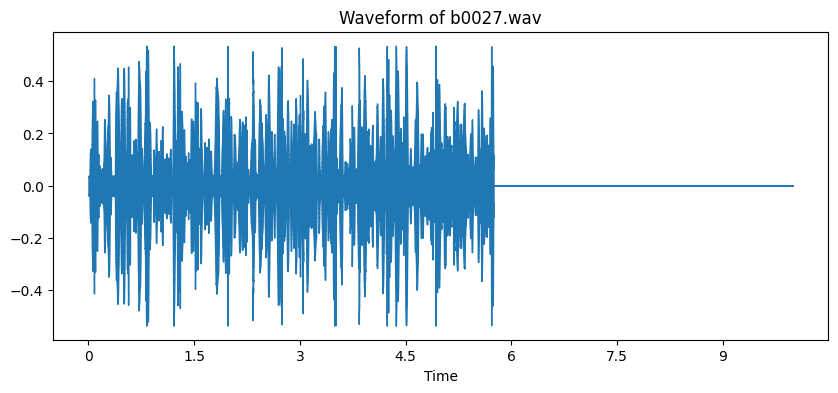

Processed and saved: /content/drive/MyDrive/processed_audio/b0027.wav
Processing file 62/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/b0028.wav


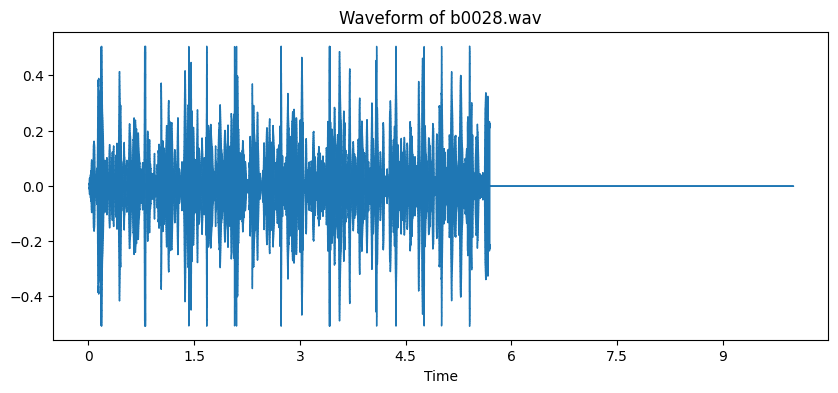

Processed and saved: /content/drive/MyDrive/processed_audio/b0028.wav
Processing file 63/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/b0029.wav


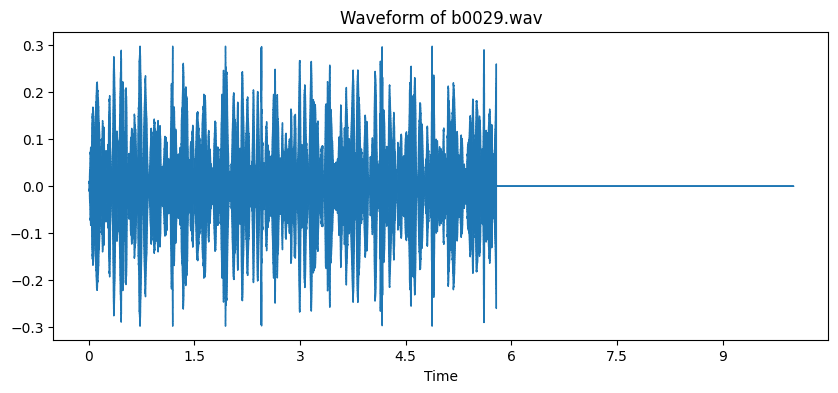

Processed and saved: /content/drive/MyDrive/processed_audio/b0029.wav
Processing file 64/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/b0031.wav


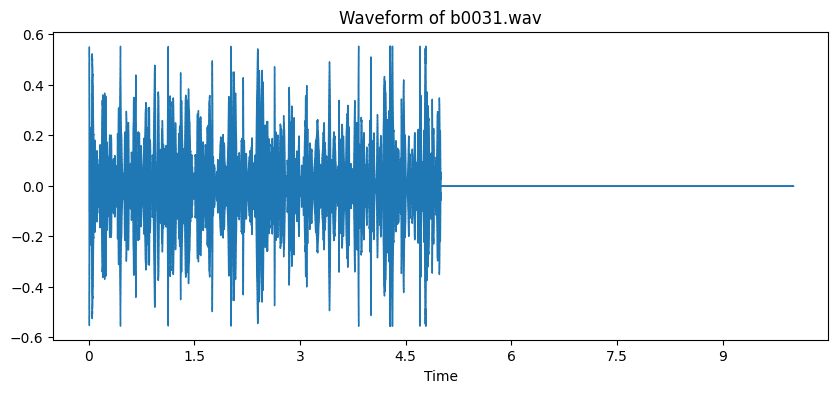

Processed and saved: /content/drive/MyDrive/processed_audio/b0031.wav
Processing file 65/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/b0034.wav


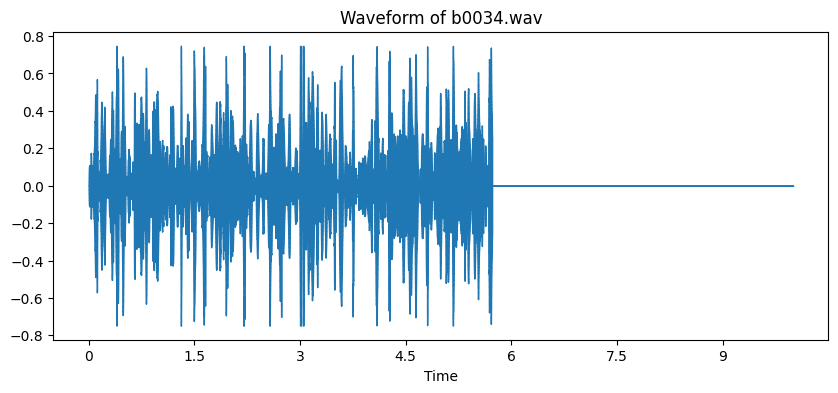

Processed and saved: /content/drive/MyDrive/processed_audio/b0034.wav
Processing file 66/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/b0035.wav


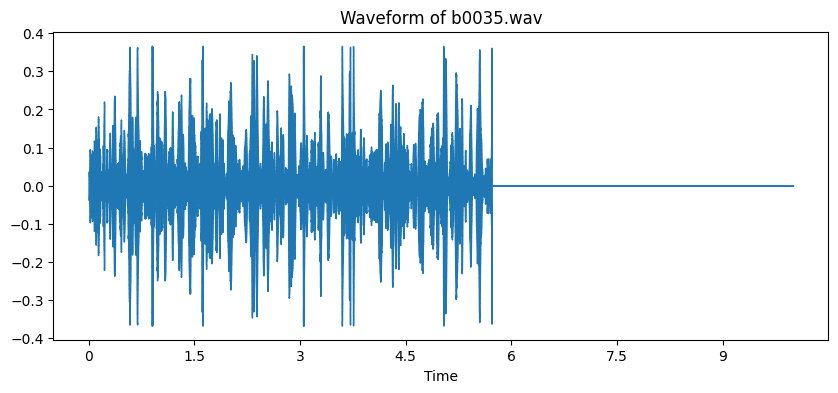

Processed and saved: /content/drive/MyDrive/processed_audio/b0035.wav
Processing file 67/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/b0036.wav


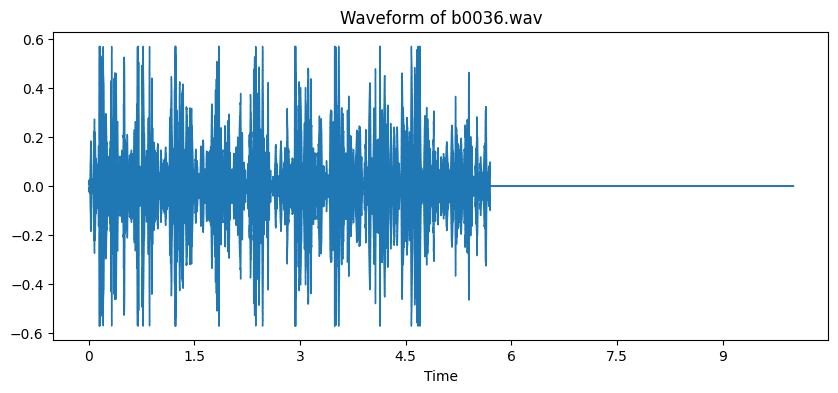

Processed and saved: /content/drive/MyDrive/processed_audio/b0036.wav
Processing file 68/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/b0038.wav


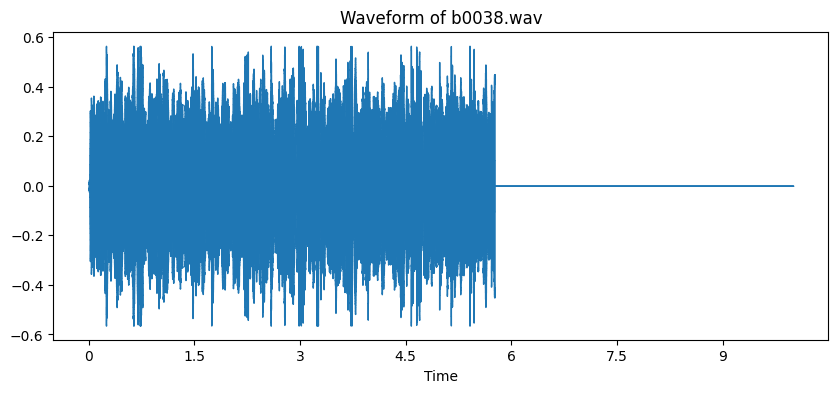

Processed and saved: /content/drive/MyDrive/processed_audio/b0038.wav
Processing file 69/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/b0039.wav


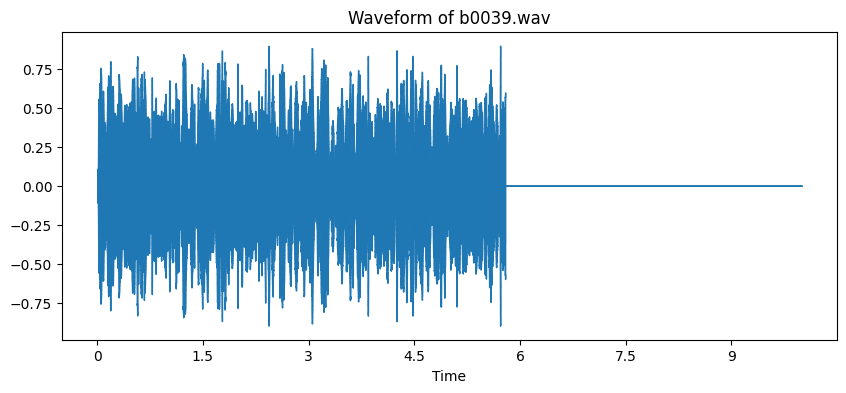

Processed and saved: /content/drive/MyDrive/processed_audio/b0039.wav
Processing file 70/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/b0042.wav


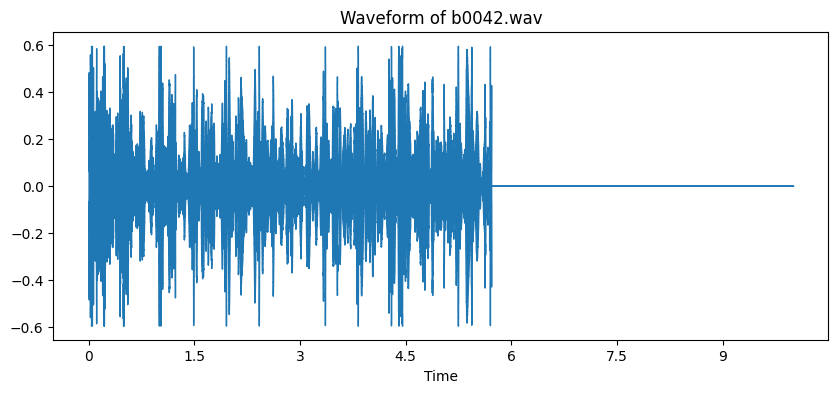

Processed and saved: /content/drive/MyDrive/processed_audio/b0042.wav
Processing file 71/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/b0044.wav


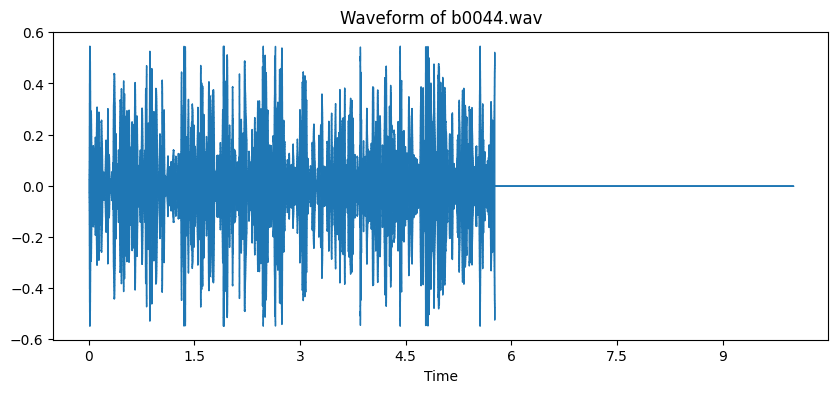

Processed and saved: /content/drive/MyDrive/processed_audio/b0044.wav
Processing file 72/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/b0045.wav


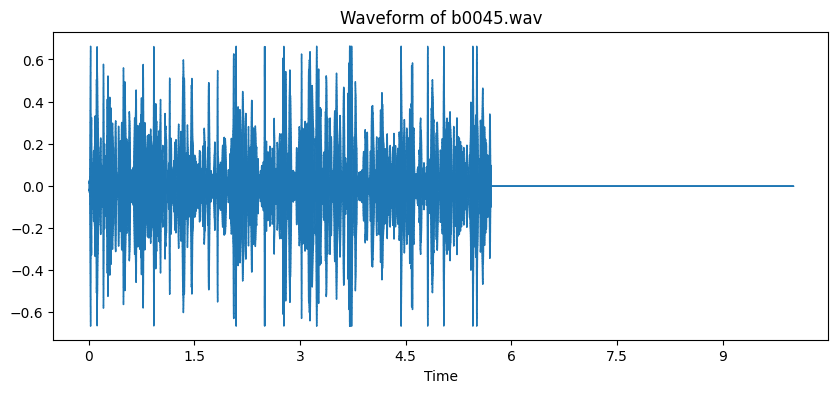

Processed and saved: /content/drive/MyDrive/processed_audio/b0045.wav
Processing file 73/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/b0047.wav


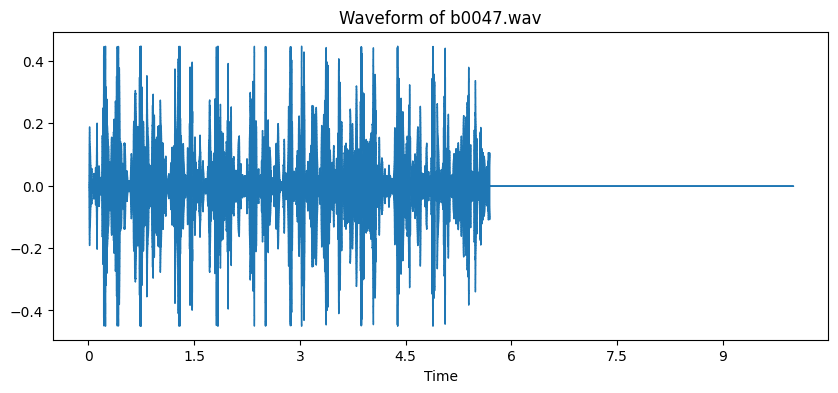

Processed and saved: /content/drive/MyDrive/processed_audio/b0047.wav
Processing file 74/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/b0049.wav


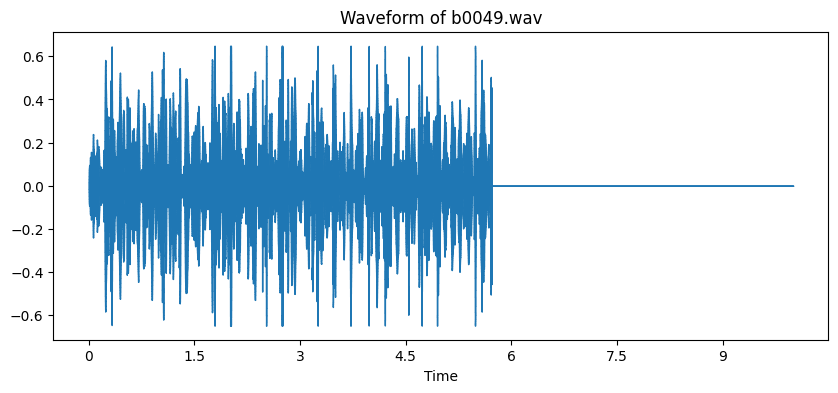

Processed and saved: /content/drive/MyDrive/processed_audio/b0049.wav
Processing file 75/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/b0050.wav


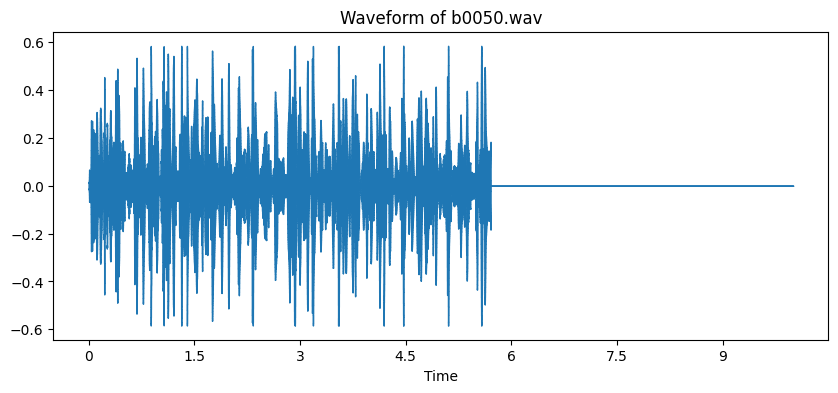

Processed and saved: /content/drive/MyDrive/processed_audio/b0050.wav
Processing file 76/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/b0051.wav


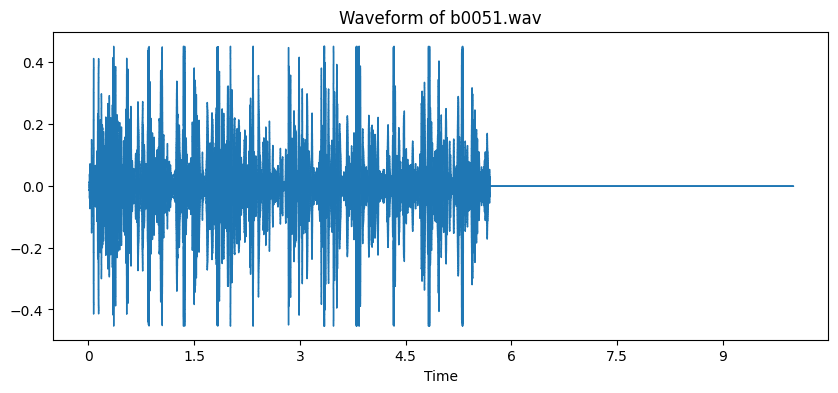

Processed and saved: /content/drive/MyDrive/processed_audio/b0051.wav
Processing file 77/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/b0052.wav


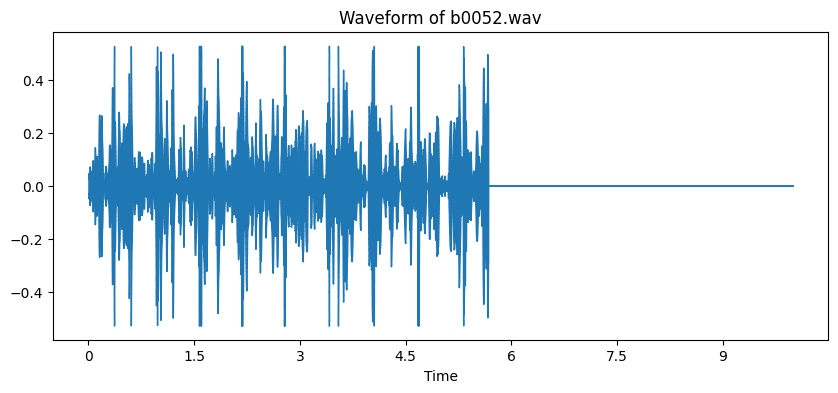

Processed and saved: /content/drive/MyDrive/processed_audio/b0052.wav
Processing file 78/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/b0053.wav


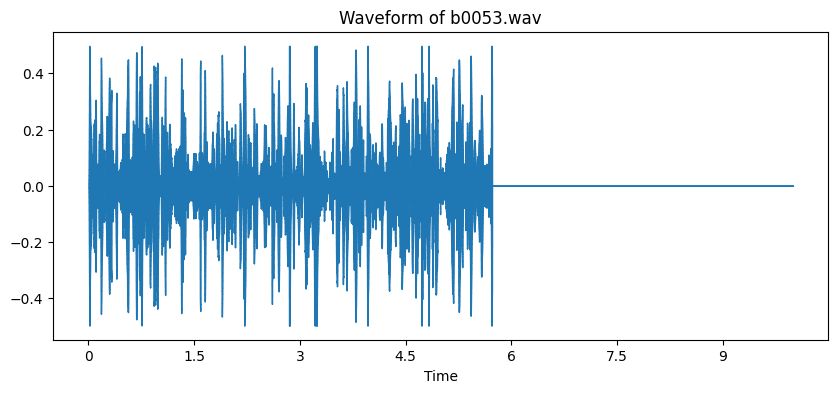

Processed and saved: /content/drive/MyDrive/processed_audio/b0053.wav
Processing file 79/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/b0055.wav


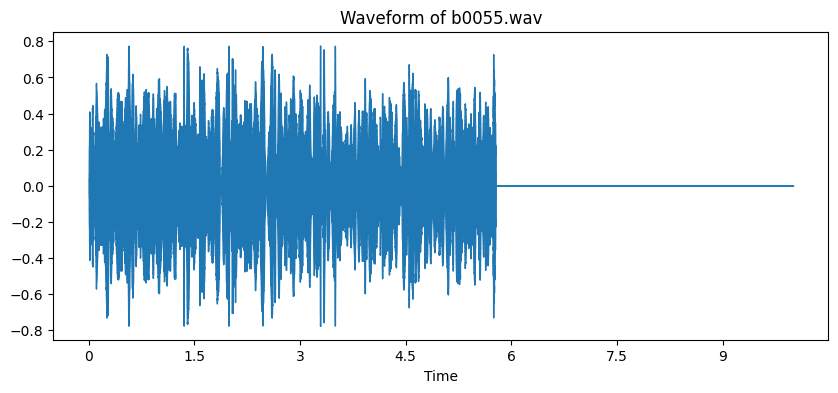

Processed and saved: /content/drive/MyDrive/processed_audio/b0055.wav
Processing file 80/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/b0056.wav


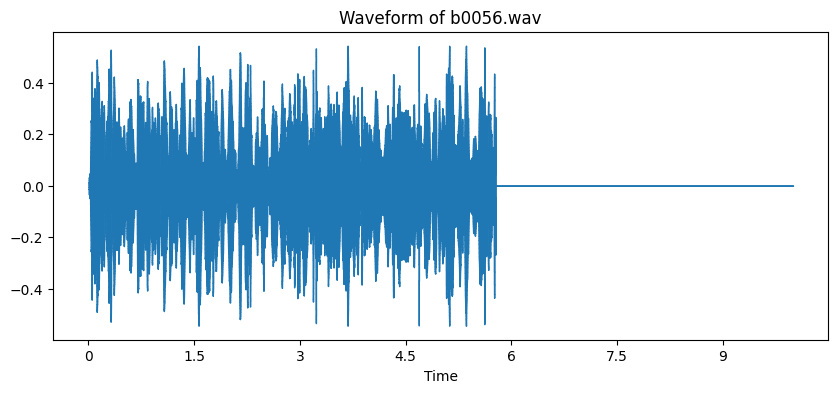

Processed and saved: /content/drive/MyDrive/processed_audio/b0056.wav
Processing file 81/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/b0058.wav


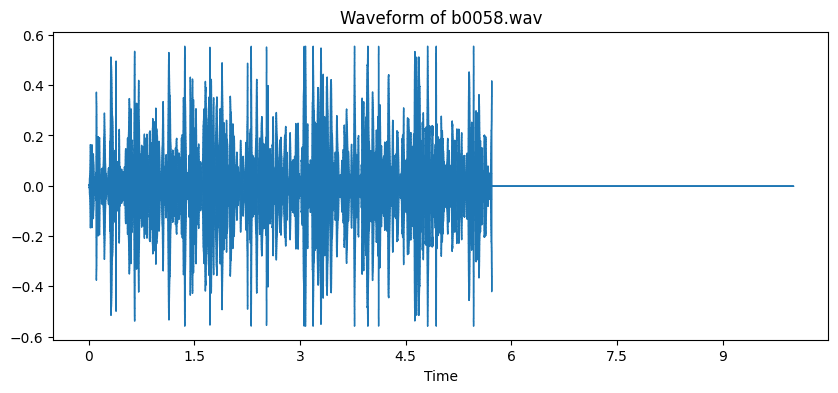

Processed and saved: /content/drive/MyDrive/processed_audio/b0058.wav
Processing file 82/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/b0059.wav


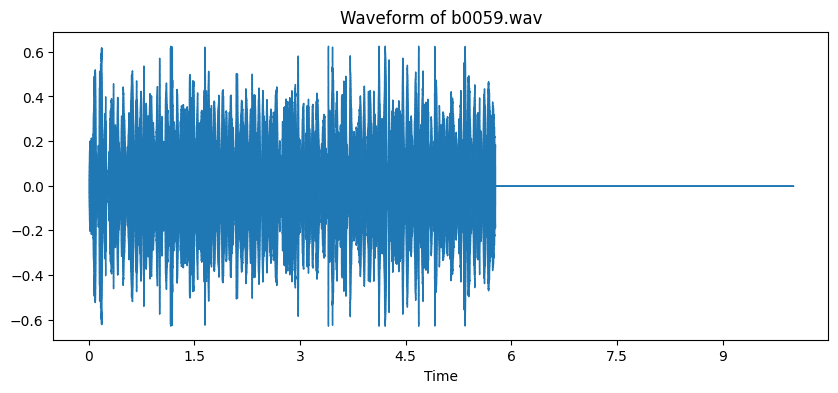

Processed and saved: /content/drive/MyDrive/processed_audio/b0059.wav
Processing file 83/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/b0060.wav


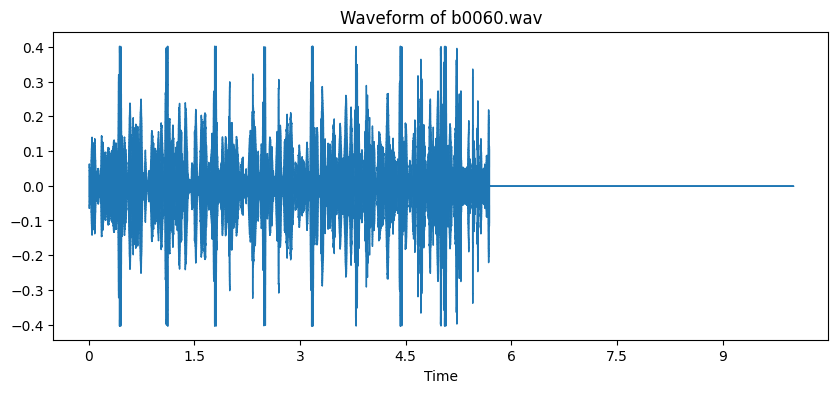

Processed and saved: /content/drive/MyDrive/processed_audio/b0060.wav
Processing file 84/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/b0061.wav


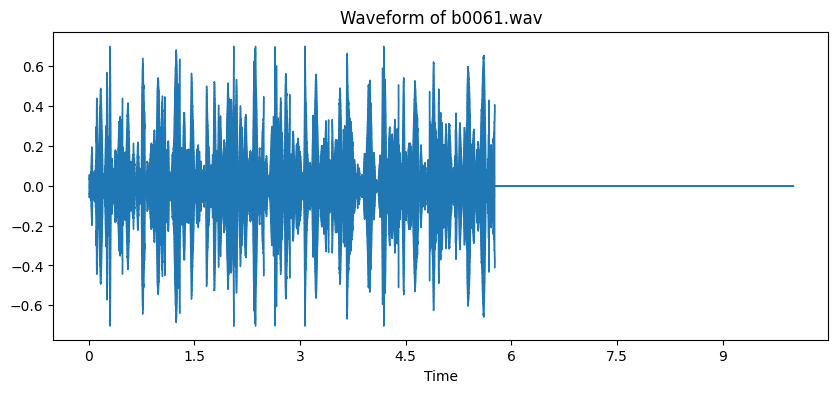

Processed and saved: /content/drive/MyDrive/processed_audio/b0061.wav
Processing file 85/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/b0062.wav


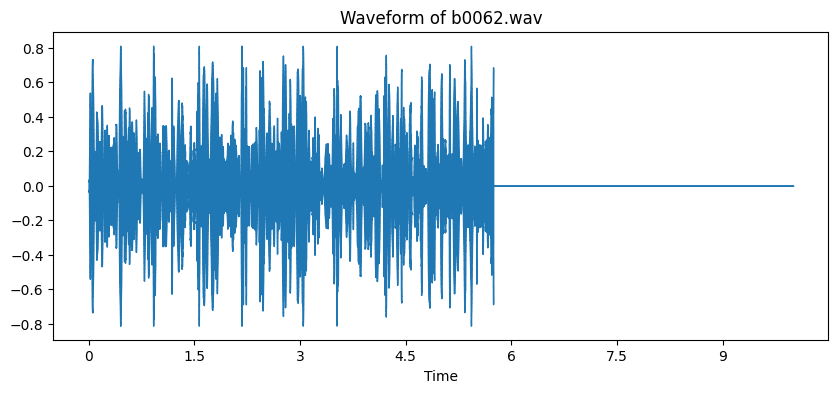

Processed and saved: /content/drive/MyDrive/processed_audio/b0062.wav
Processing file 86/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/b0064.wav


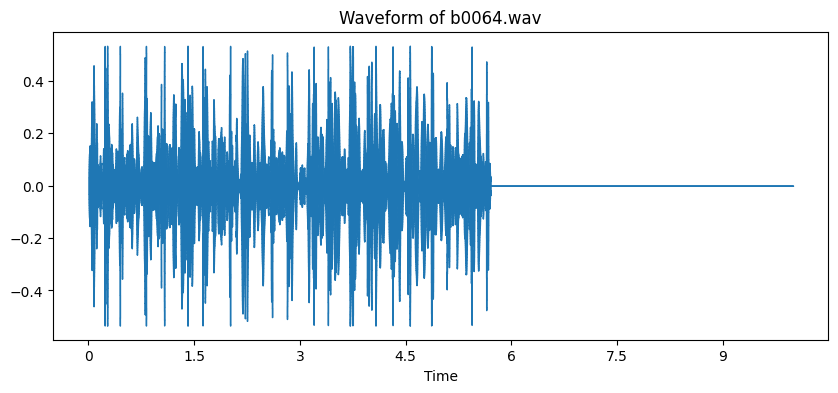

Processed and saved: /content/drive/MyDrive/processed_audio/b0064.wav
Processing file 87/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/b0065.wav


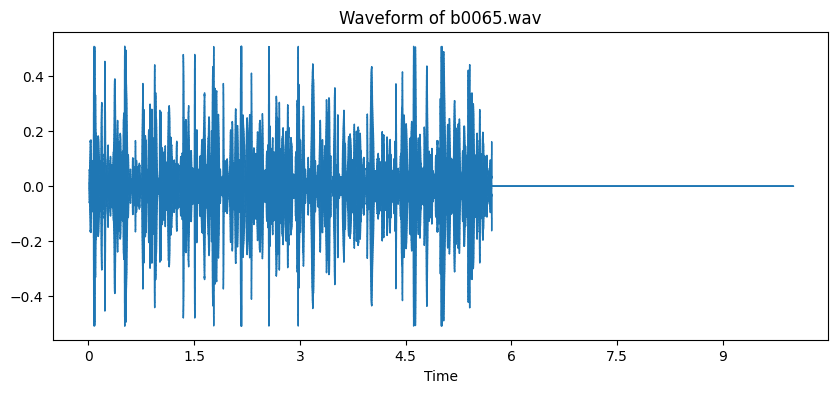

Processed and saved: /content/drive/MyDrive/processed_audio/b0065.wav
Processing file 88/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/b0066.wav


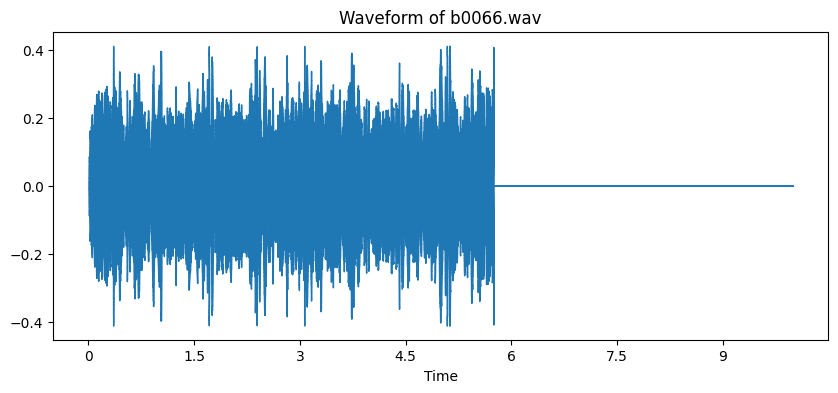

Processed and saved: /content/drive/MyDrive/processed_audio/b0066.wav
Processing file 89/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/b0067.wav


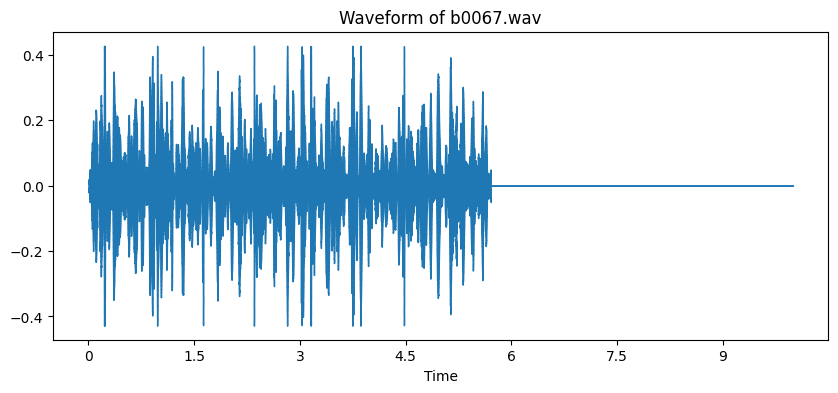

Processed and saved: /content/drive/MyDrive/processed_audio/b0067.wav
Processing file 90/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/c0003.wav


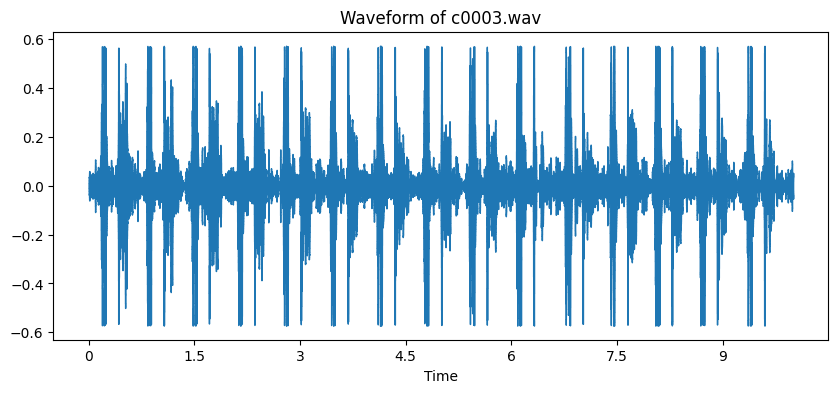

Processed and saved: /content/drive/MyDrive/processed_audio/c0003.wav
Processing file 91/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/c0006.wav


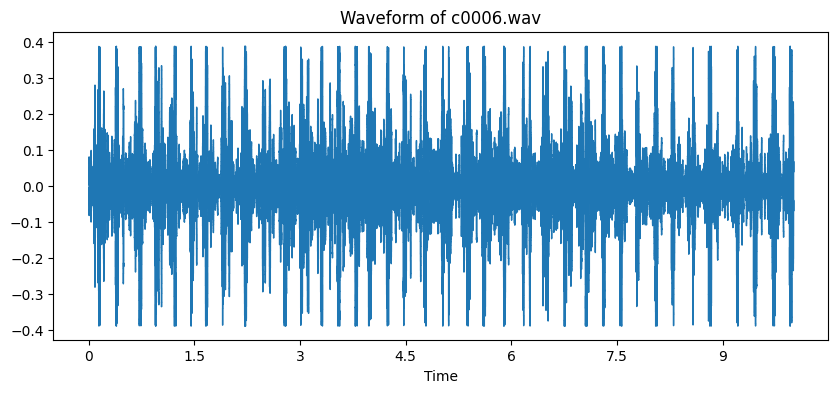

Processed and saved: /content/drive/MyDrive/processed_audio/c0006.wav
Processing file 92/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/c0007.wav


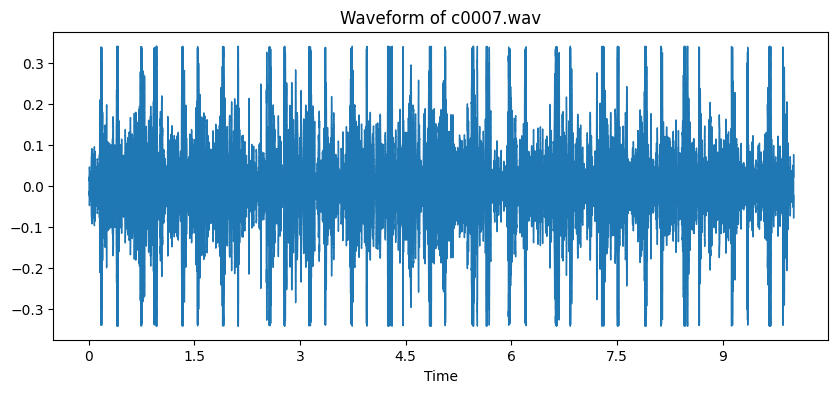

Processed and saved: /content/drive/MyDrive/processed_audio/c0007.wav
Processing file 93/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/d0001.wav


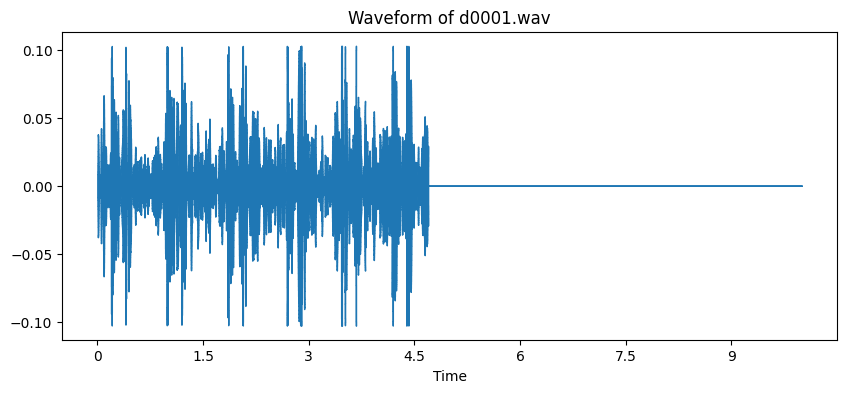

Processed and saved: /content/drive/MyDrive/processed_audio/d0001.wav
Processing file 94/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/d0005.wav


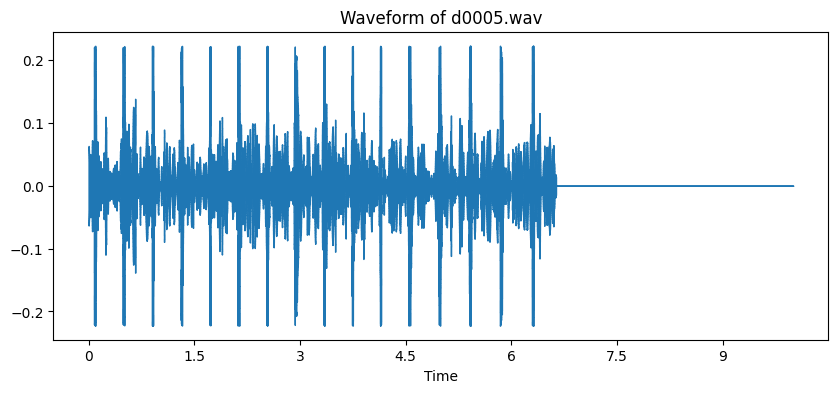

Processed and saved: /content/drive/MyDrive/processed_audio/d0005.wav
Processing file 95/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/d0006.wav


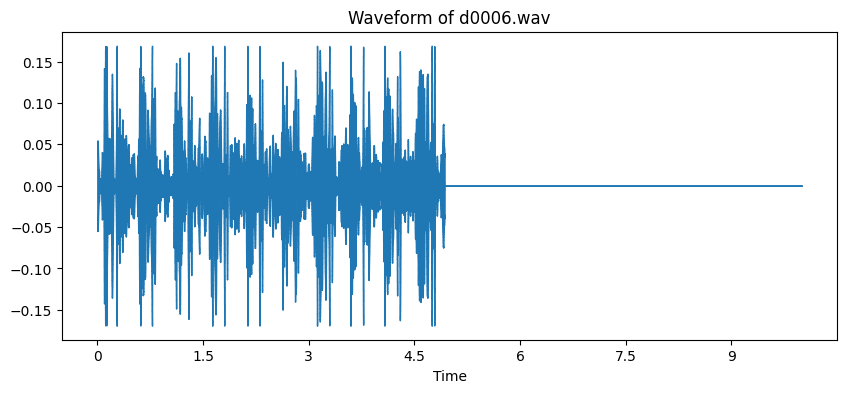

Processed and saved: /content/drive/MyDrive/processed_audio/d0006.wav
Processing file 96/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/d0007.wav


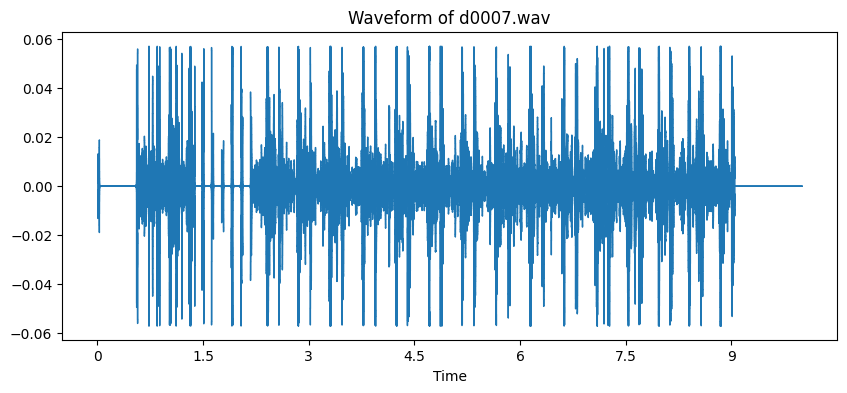

Processed and saved: /content/drive/MyDrive/processed_audio/d0007.wav
Processing file 97/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/d0013.wav


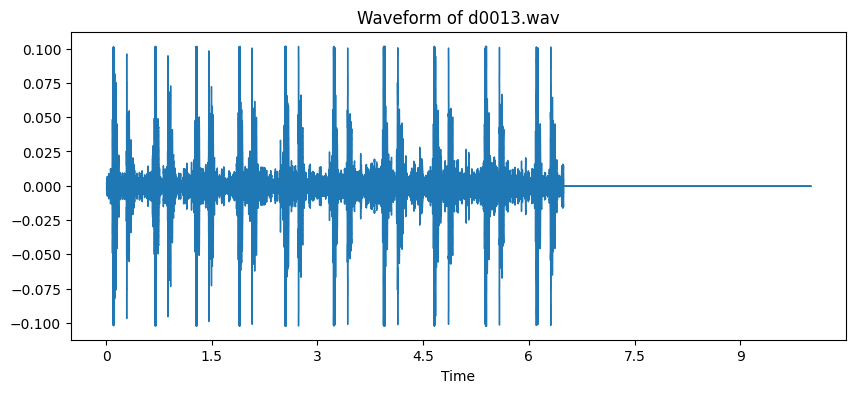

Processed and saved: /content/drive/MyDrive/processed_audio/d0013.wav
Processing file 98/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/e00001.wav


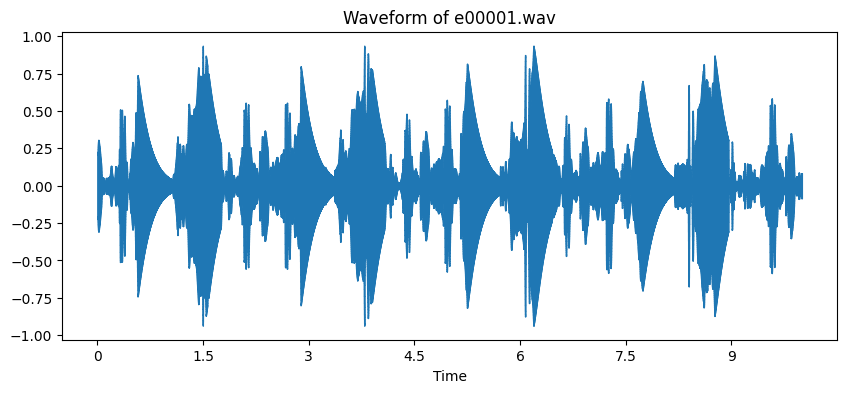

Processed and saved: /content/drive/MyDrive/processed_audio/e00001.wav
Processing file 99/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/e00002.wav


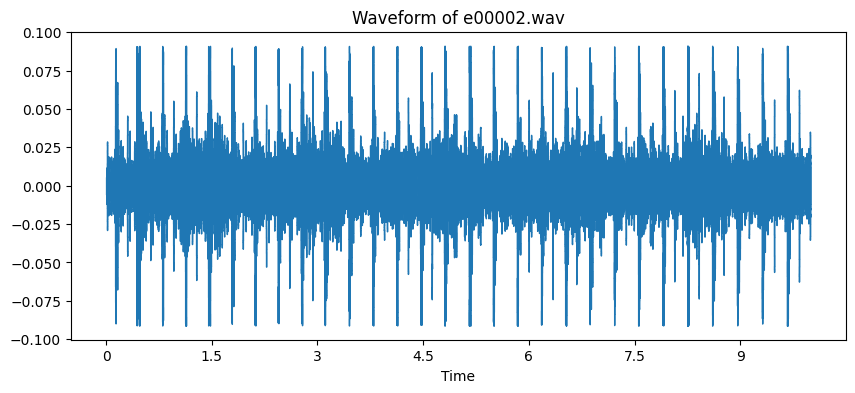

Processed and saved: /content/drive/MyDrive/processed_audio/e00002.wav
Processing file 100/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/e00003.wav


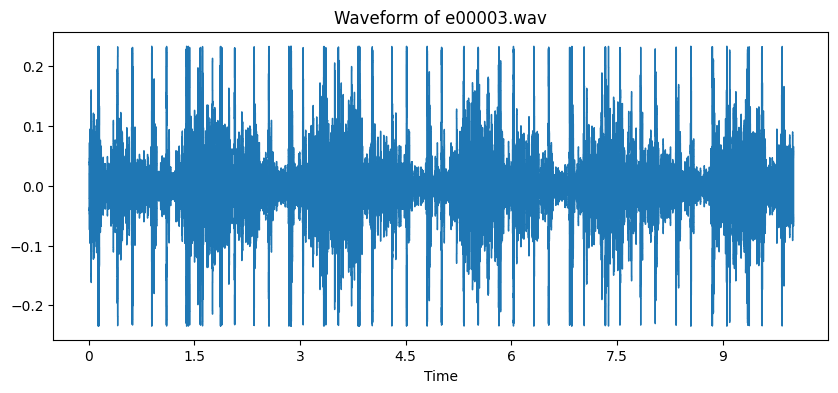

Processed and saved: /content/drive/MyDrive/processed_audio/e00003.wav
Processing file 101/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/e00004.wav


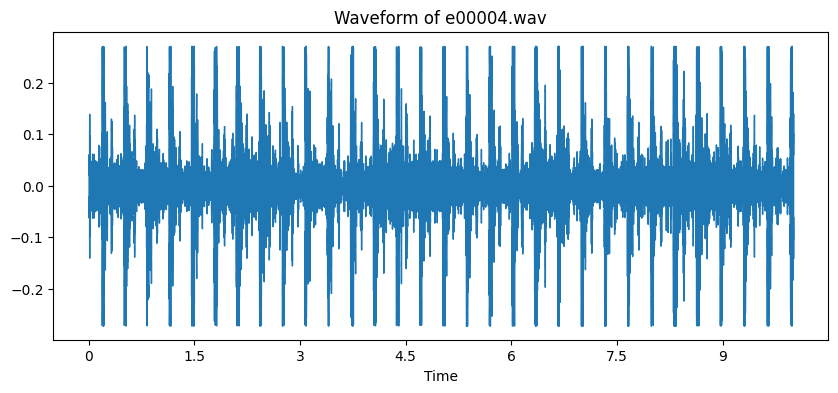

Processed and saved: /content/drive/MyDrive/processed_audio/e00004.wav
Processing file 102/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/e00005.wav


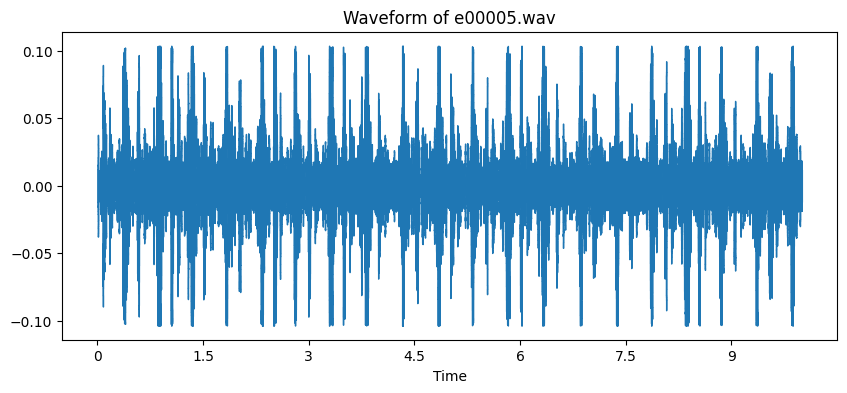

Processed and saved: /content/drive/MyDrive/processed_audio/e00005.wav
Processing file 103/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/e00006.wav


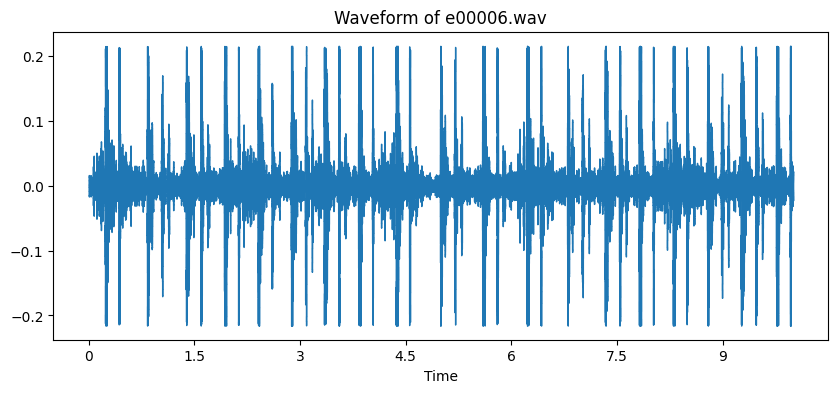

Processed and saved: /content/drive/MyDrive/processed_audio/e00006.wav
Processing file 104/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/e00007.wav


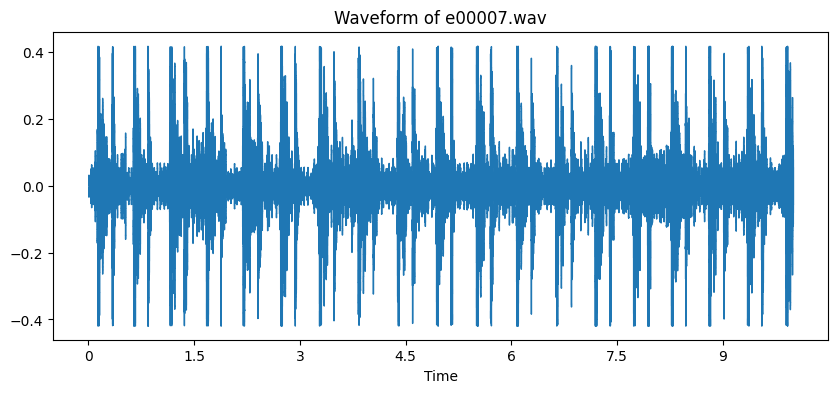

Processed and saved: /content/drive/MyDrive/processed_audio/e00007.wav
Processing file 105/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/e00008.wav


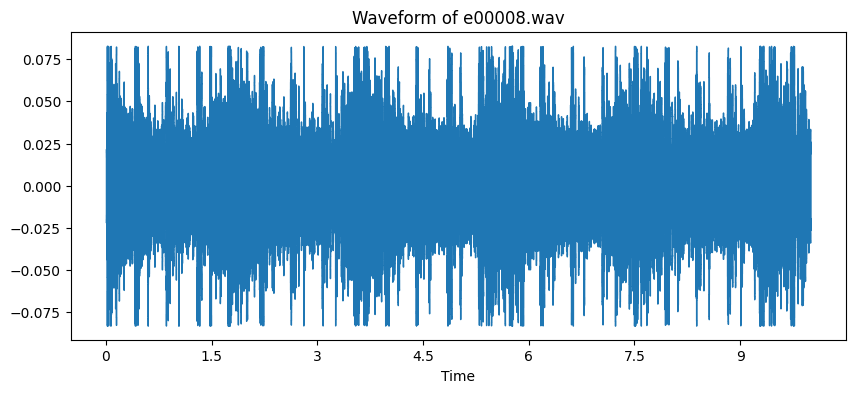

Processed and saved: /content/drive/MyDrive/processed_audio/e00008.wav
Processing file 106/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/e00009.wav


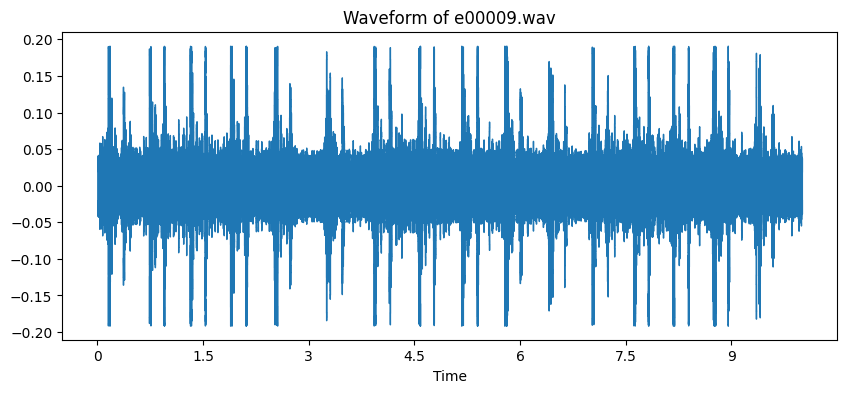

Processed and saved: /content/drive/MyDrive/processed_audio/e00009.wav
Processing file 107/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/e00010.wav


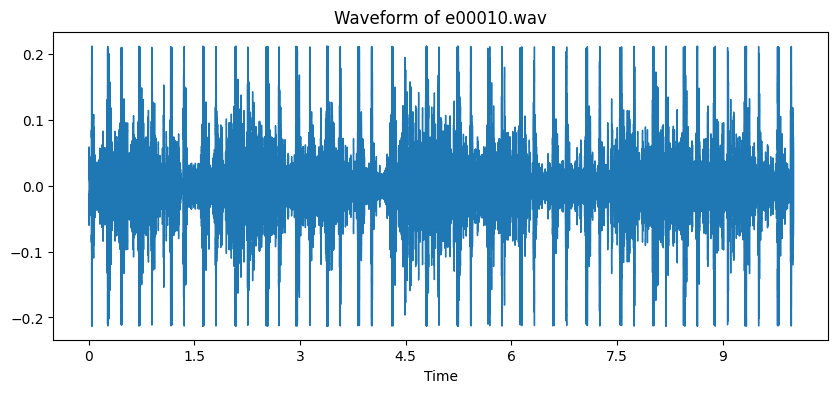

Processed and saved: /content/drive/MyDrive/processed_audio/e00010.wav
Processing file 108/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/e00011.wav


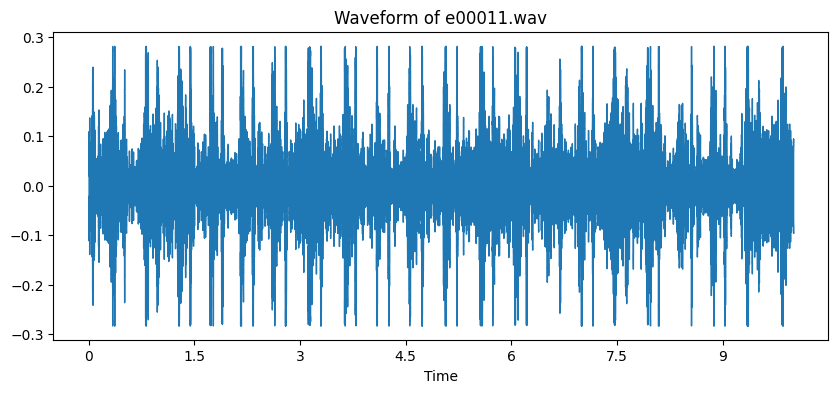

Processed and saved: /content/drive/MyDrive/processed_audio/e00011.wav
Processing file 109/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/e00012.wav


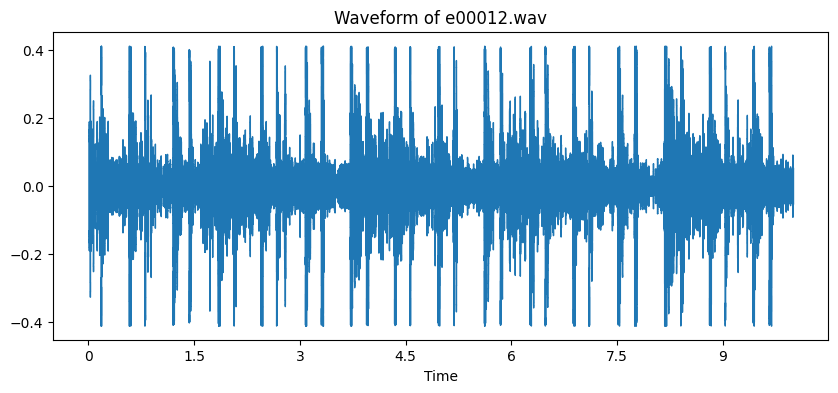

Processed and saved: /content/drive/MyDrive/processed_audio/e00012.wav
Processing file 110/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/e00013.wav


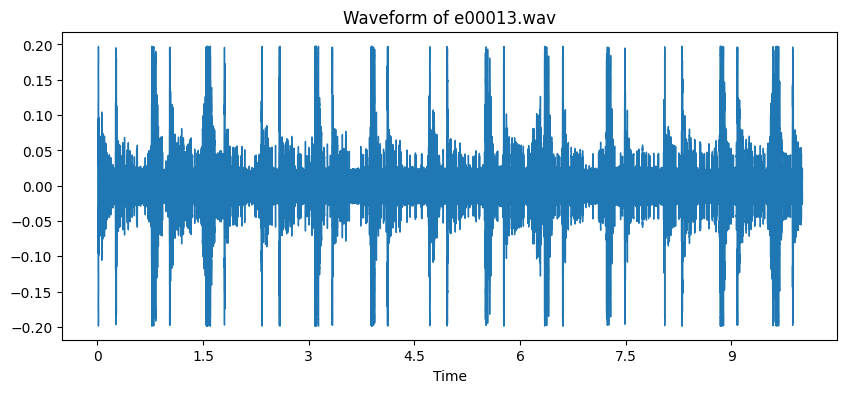

Processed and saved: /content/drive/MyDrive/processed_audio/e00013.wav
Processing file 111/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/e00014.wav


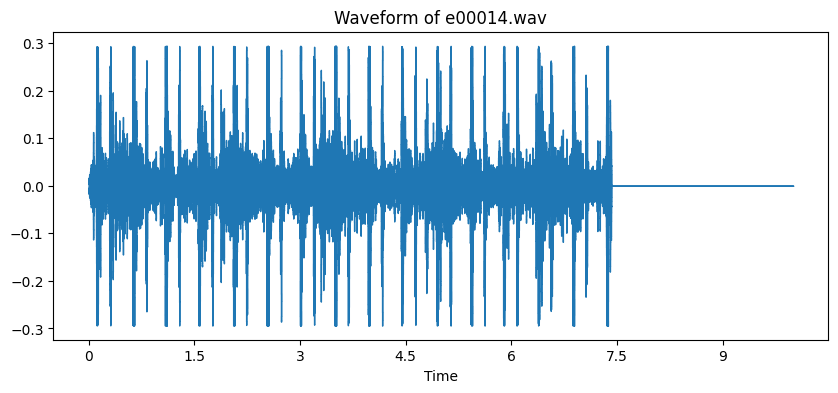

Processed and saved: /content/drive/MyDrive/processed_audio/e00014.wav
Processing file 112/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/e00015.wav


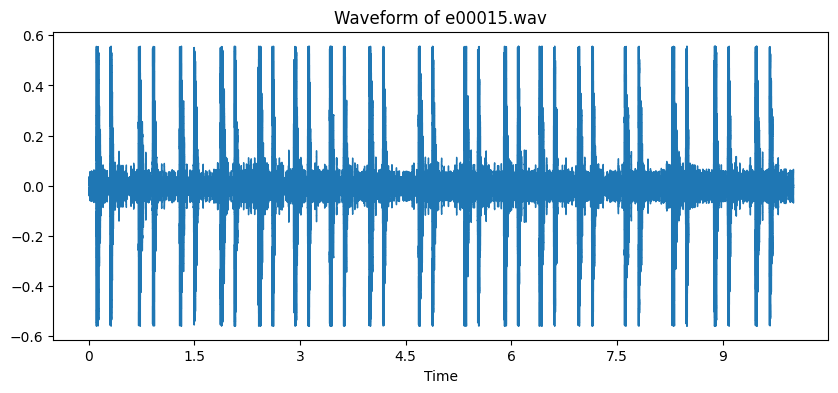

Processed and saved: /content/drive/MyDrive/processed_audio/e00015.wav
Processing file 113/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/e00016.wav


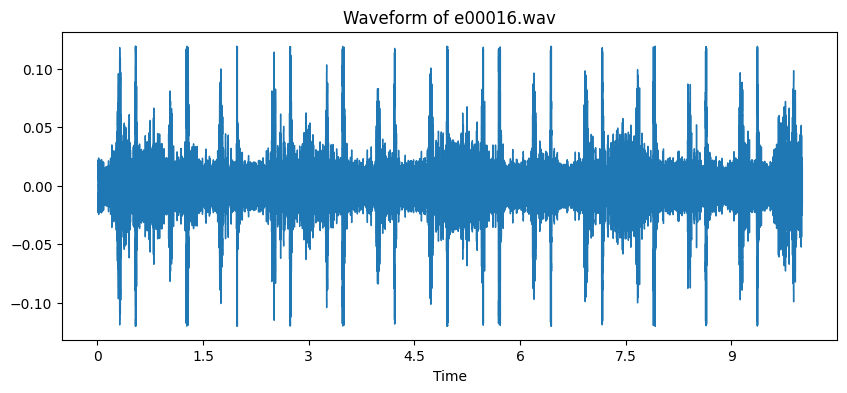

Processed and saved: /content/drive/MyDrive/processed_audio/e00016.wav
Processing file 114/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/e00017.wav


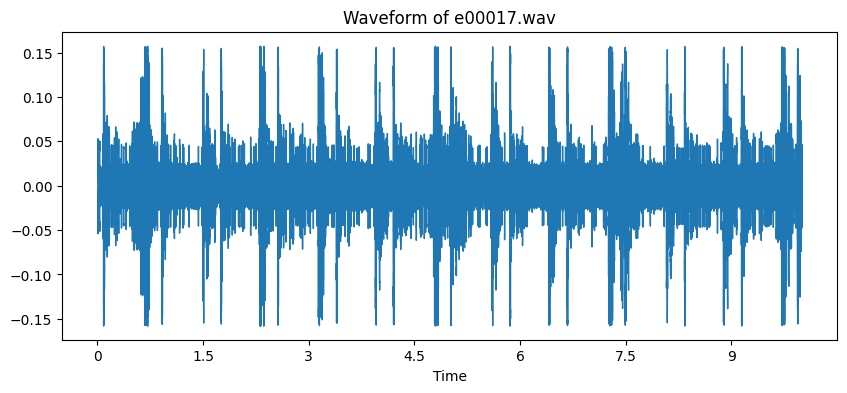

Processed and saved: /content/drive/MyDrive/processed_audio/e00017.wav
Processing file 115/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/e00018.wav


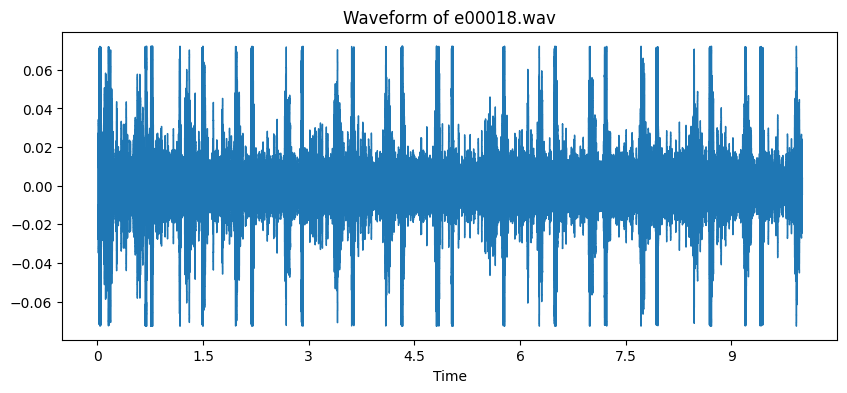

Processed and saved: /content/drive/MyDrive/processed_audio/e00018.wav
Processing file 116/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/e00019.wav


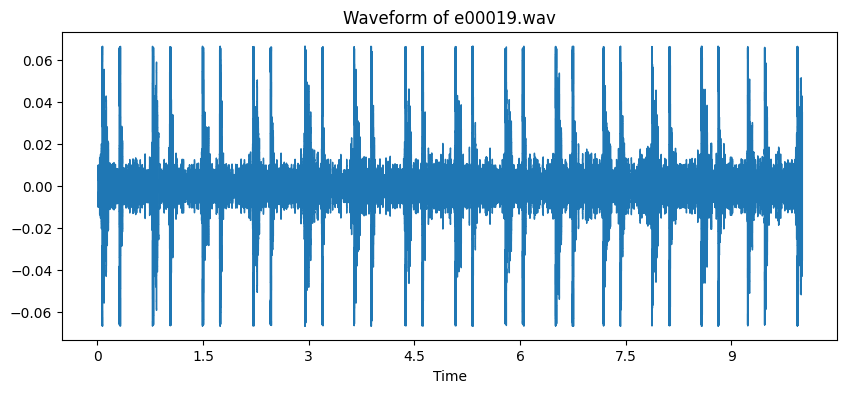

Processed and saved: /content/drive/MyDrive/processed_audio/e00019.wav
Processing file 117/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/e00021.wav


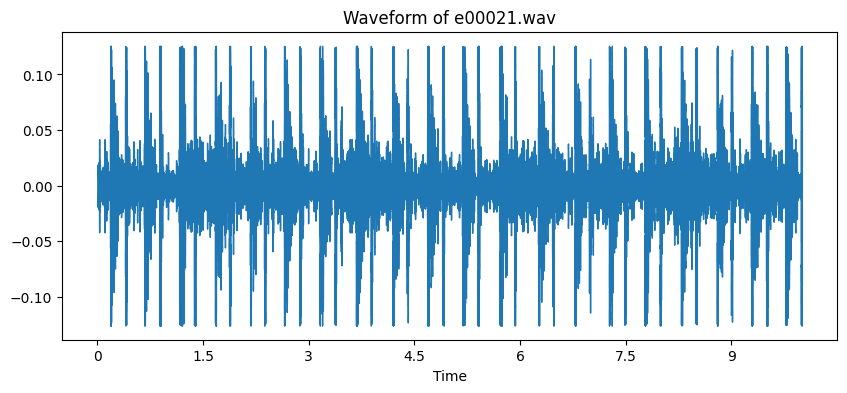

Processed and saved: /content/drive/MyDrive/processed_audio/e00021.wav
Processing file 118/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/e00022.wav


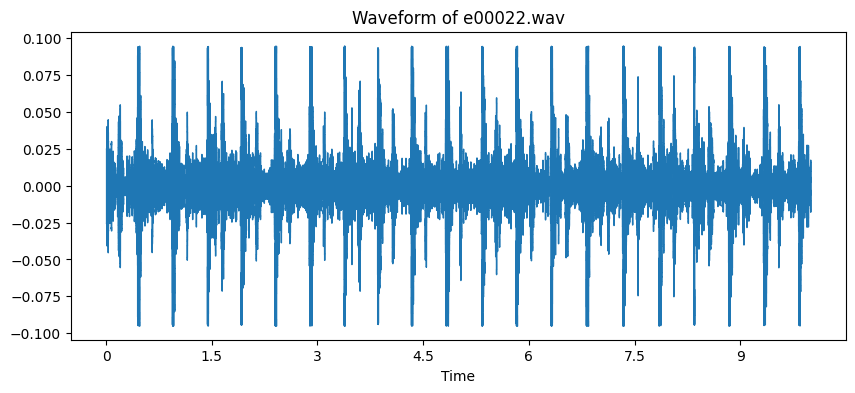

Processed and saved: /content/drive/MyDrive/processed_audio/e00022.wav
Processing file 119/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/e00023.wav


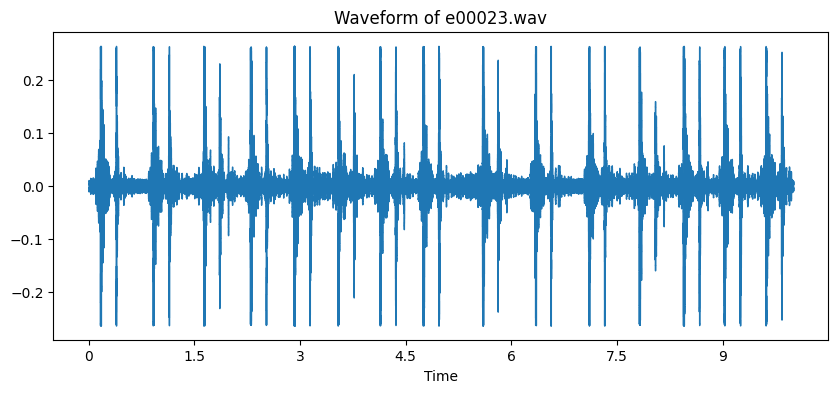

Processed and saved: /content/drive/MyDrive/processed_audio/e00023.wav
Processing file 120/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/e00024.wav


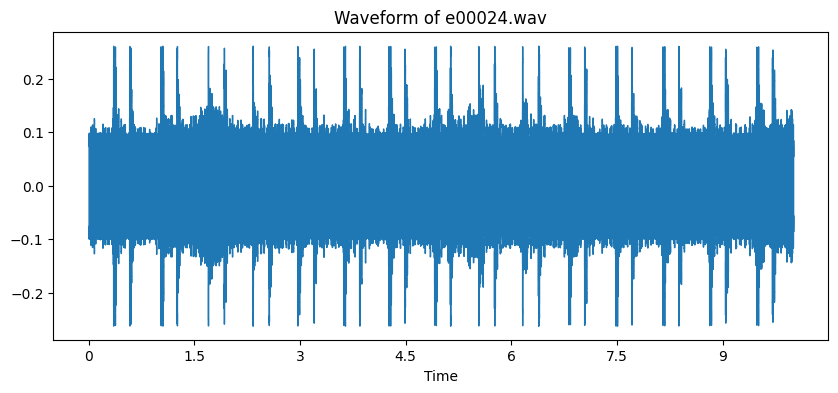

Processed and saved: /content/drive/MyDrive/processed_audio/e00024.wav
Processing file 121/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/e00025.wav


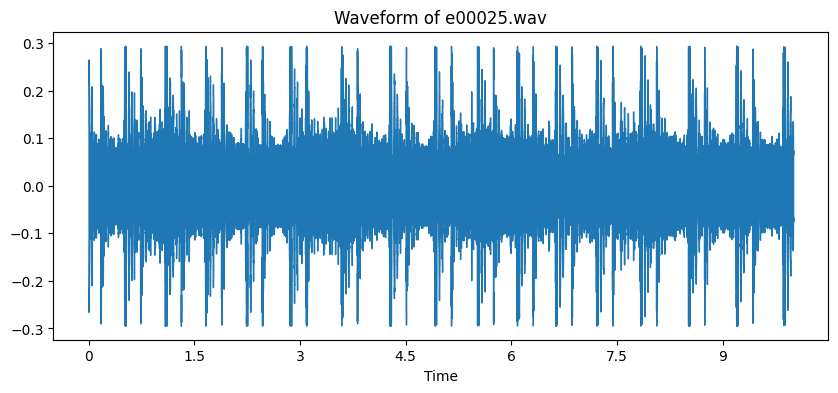

Processed and saved: /content/drive/MyDrive/processed_audio/e00025.wav
Processing file 122/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/e00026.wav


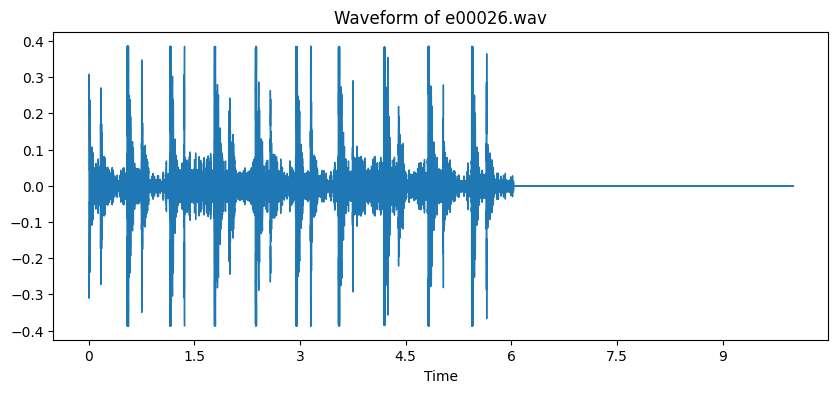

Processed and saved: /content/drive/MyDrive/processed_audio/e00026.wav
Processing file 123/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/e00027.wav


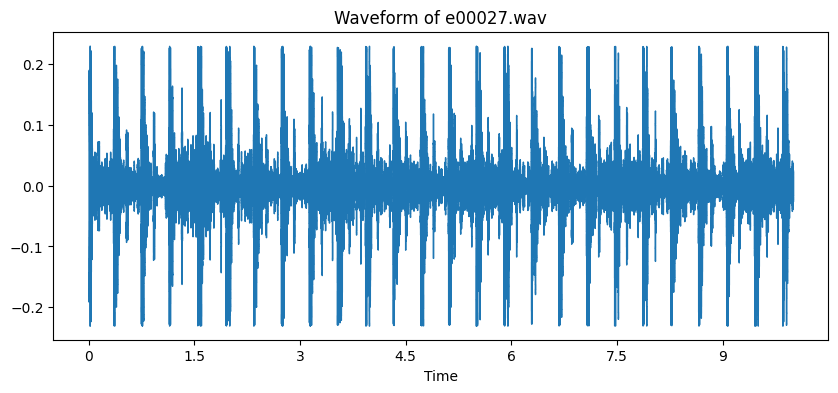

Processed and saved: /content/drive/MyDrive/processed_audio/e00027.wav
Processing file 124/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/e00028.wav


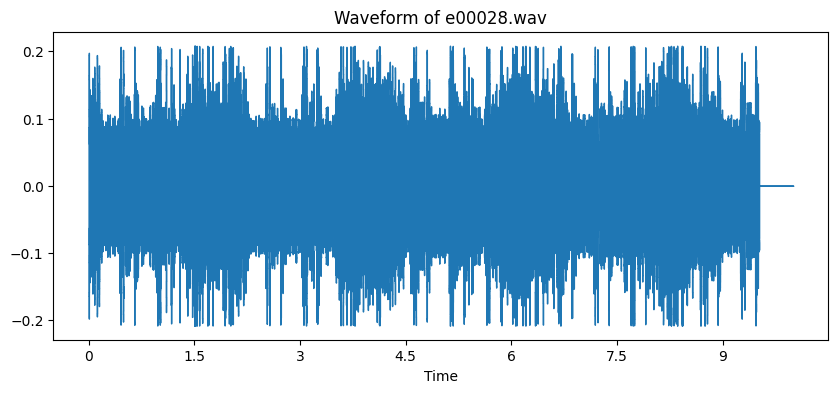

Processed and saved: /content/drive/MyDrive/processed_audio/e00028.wav
Processing file 125/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/e00029.wav


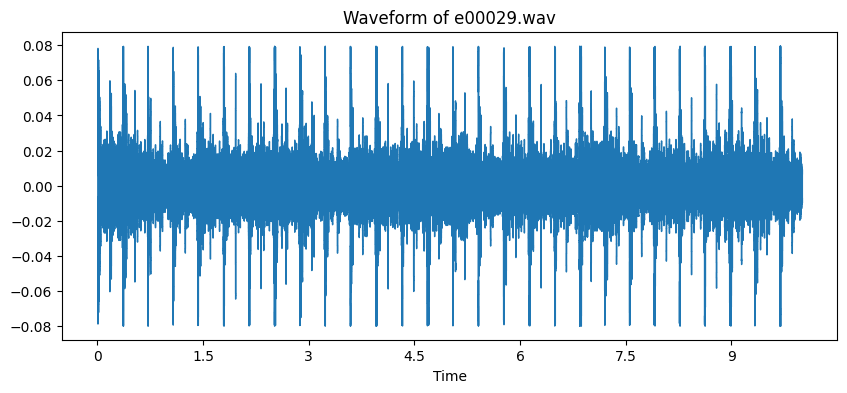

Processed and saved: /content/drive/MyDrive/processed_audio/e00029.wav
Processing file 126/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/e00030.wav


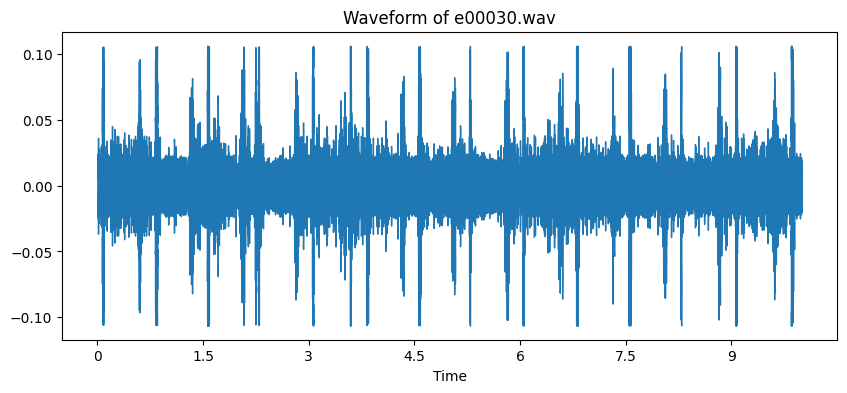

Processed and saved: /content/drive/MyDrive/processed_audio/e00030.wav
Processing file 127/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/e00031.wav


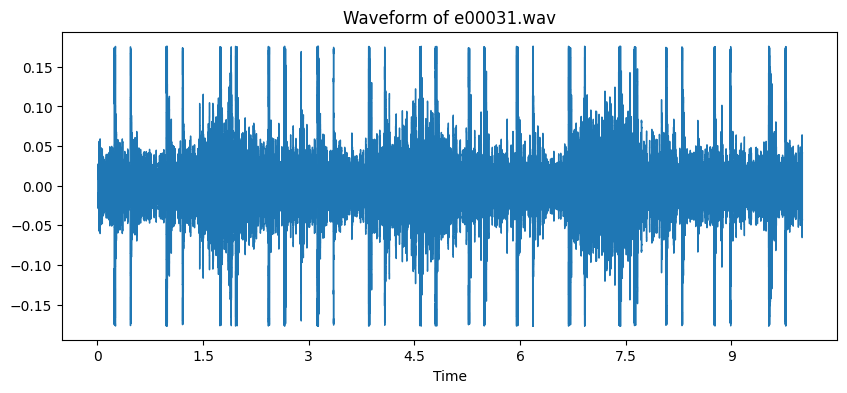

Processed and saved: /content/drive/MyDrive/processed_audio/e00031.wav
Processing file 128/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/e00032.wav


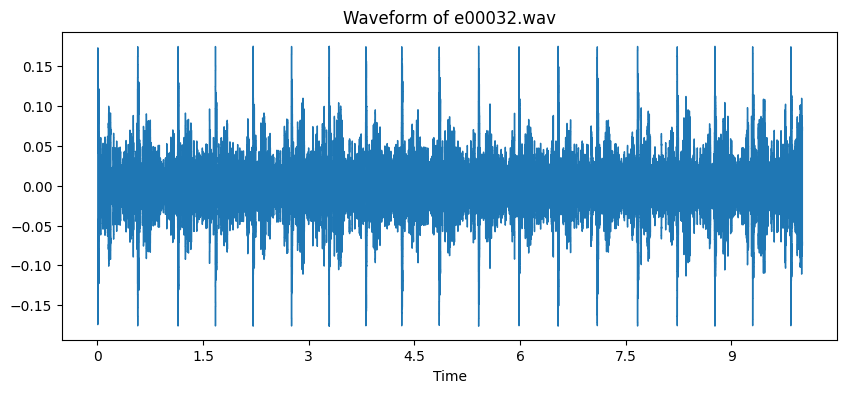

Processed and saved: /content/drive/MyDrive/processed_audio/e00032.wav
Processing file 129/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/e00033.wav


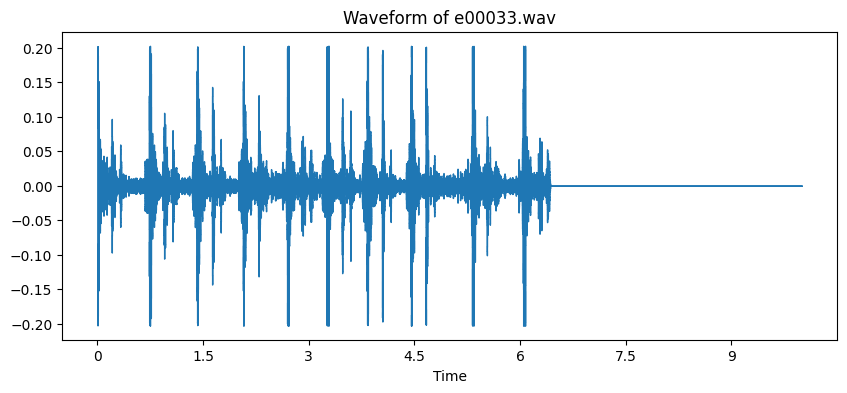

Processed and saved: /content/drive/MyDrive/processed_audio/e00033.wav
Processing file 130/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/e00034.wav


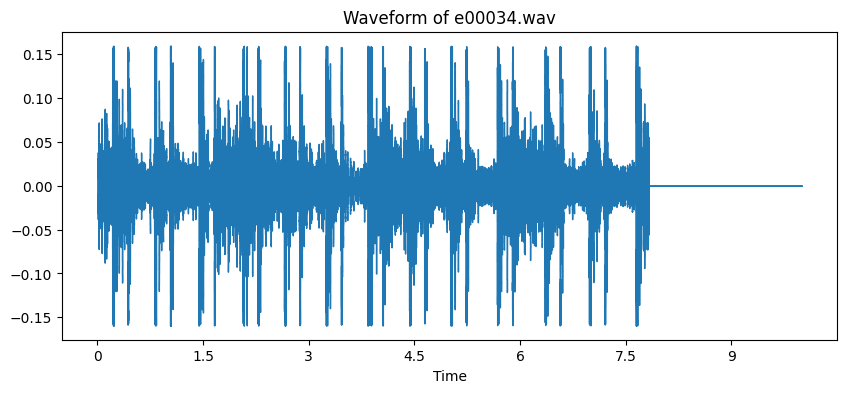

Processed and saved: /content/drive/MyDrive/processed_audio/e00034.wav
Processing file 131/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/e00035.wav


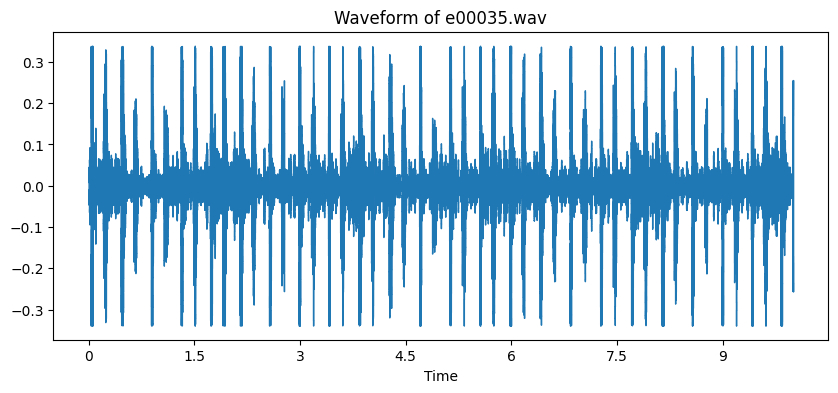

Processed and saved: /content/drive/MyDrive/processed_audio/e00035.wav
Processing file 132/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/e00036.wav


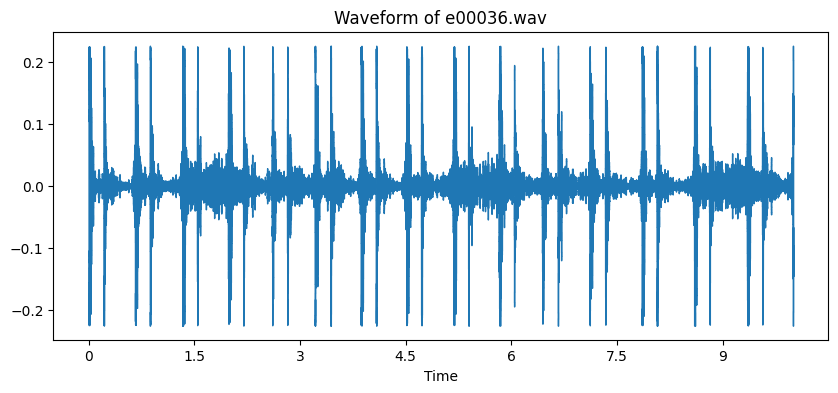

Processed and saved: /content/drive/MyDrive/processed_audio/e00036.wav
Processing file 133/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/e00037.wav


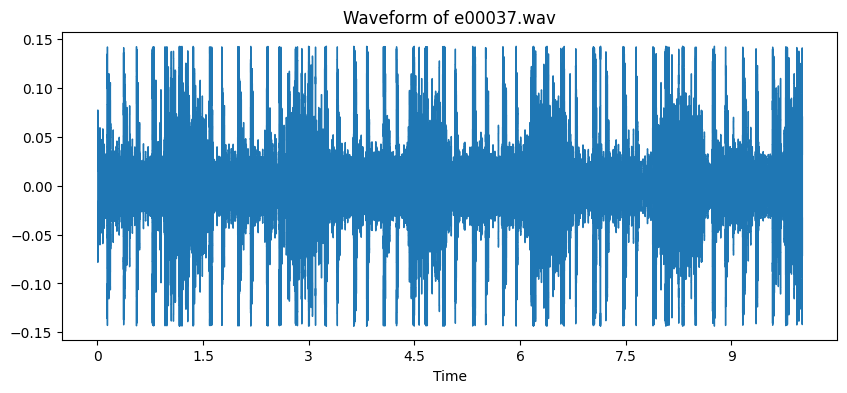

Processed and saved: /content/drive/MyDrive/processed_audio/e00037.wav
Processing file 134/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/e00038.wav


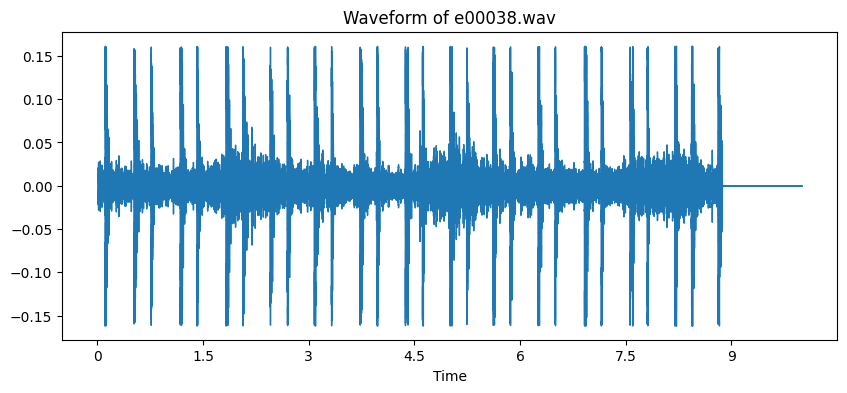

Processed and saved: /content/drive/MyDrive/processed_audio/e00038.wav
Processing file 135/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/e00039.wav


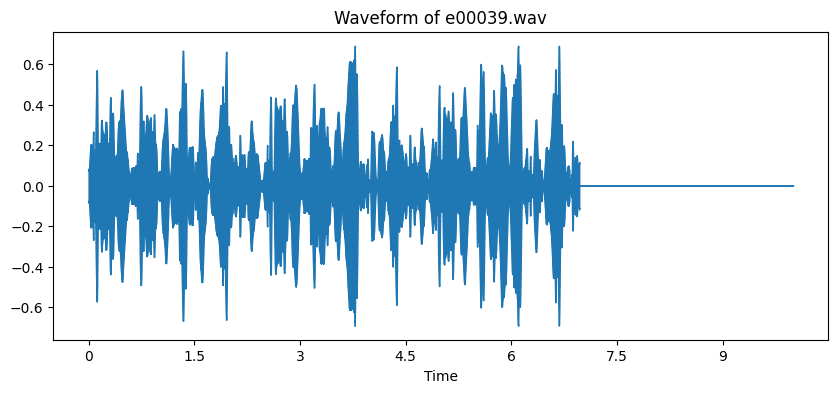

Processed and saved: /content/drive/MyDrive/processed_audio/e00039.wav
Processing file 136/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/e00040.wav


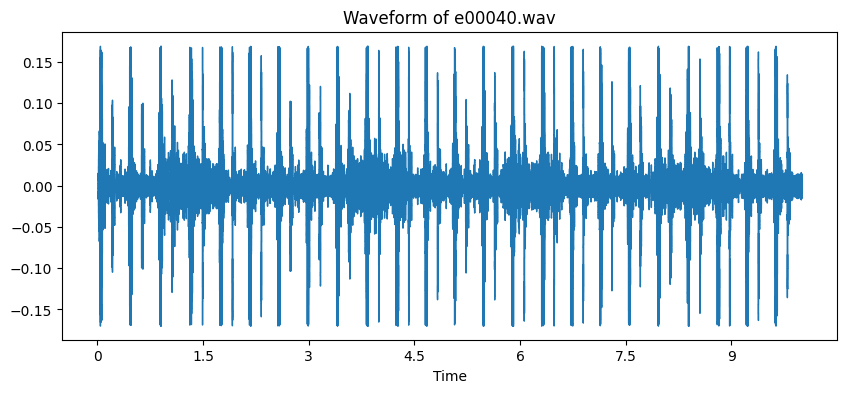

Processed and saved: /content/drive/MyDrive/processed_audio/e00040.wav
Processing file 137/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/e00041.wav


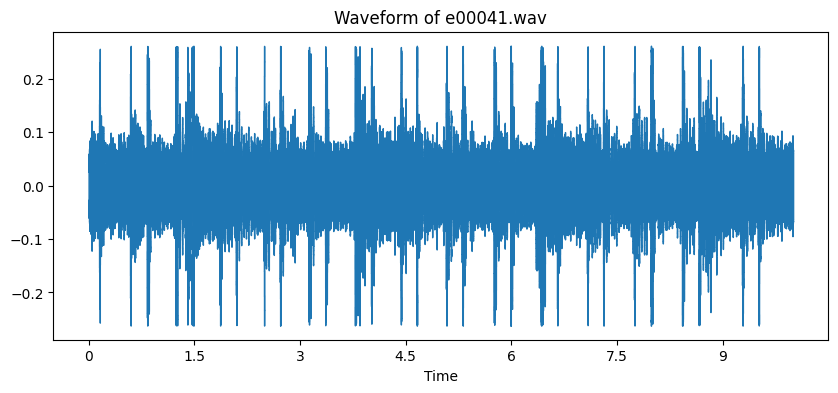

Processed and saved: /content/drive/MyDrive/processed_audio/e00041.wav
Processing file 138/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/e00042.wav


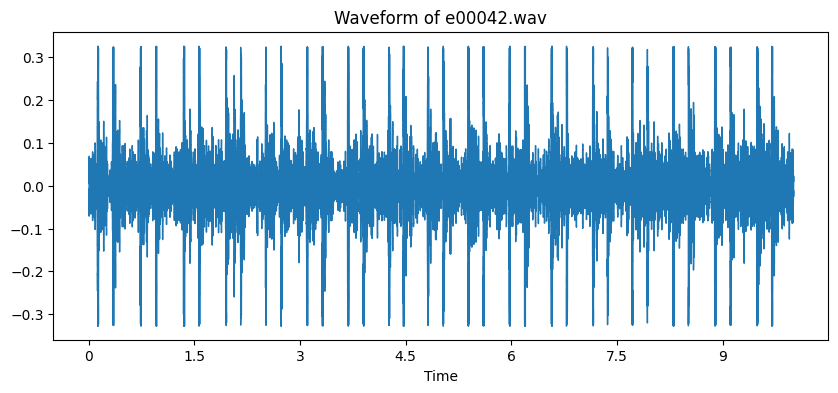

Processed and saved: /content/drive/MyDrive/processed_audio/e00042.wav
Processing file 139/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/e00043.wav


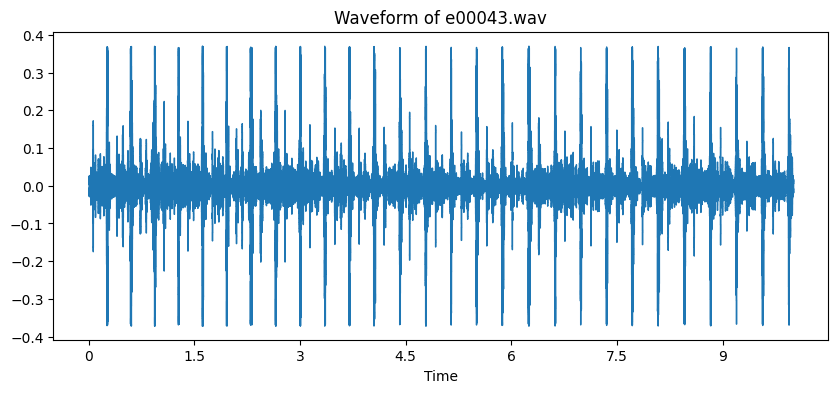

Processed and saved: /content/drive/MyDrive/processed_audio/e00043.wav
Processing file 140/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/e00044.wav


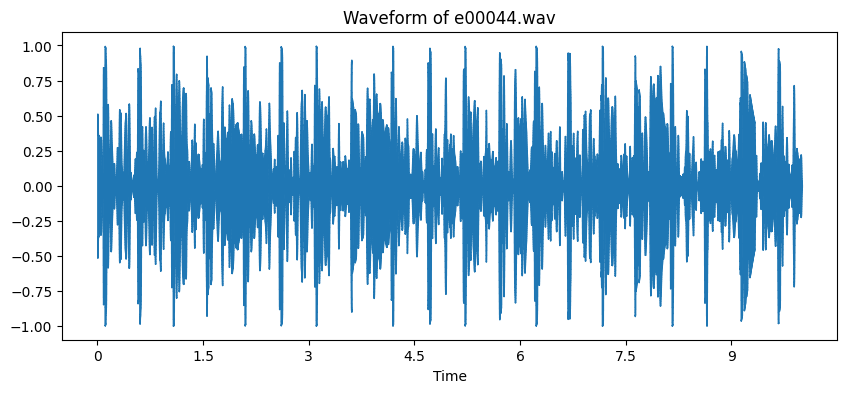

Processed and saved: /content/drive/MyDrive/processed_audio/e00044.wav
Processing file 141/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/e00045.wav


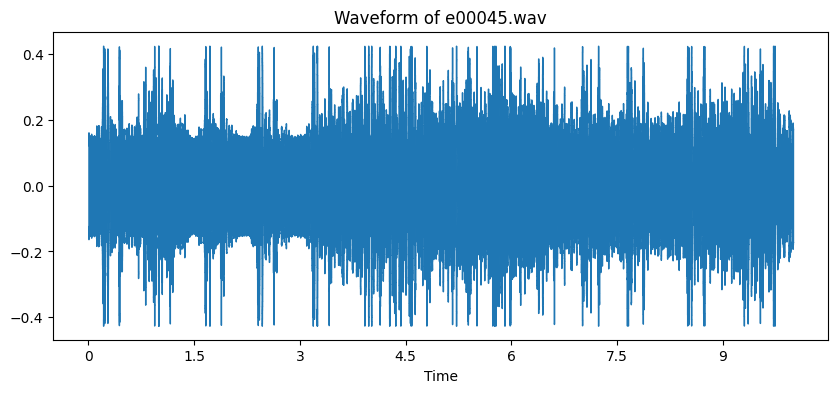

Processed and saved: /content/drive/MyDrive/processed_audio/e00045.wav
Processing file 142/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/e00046.wav


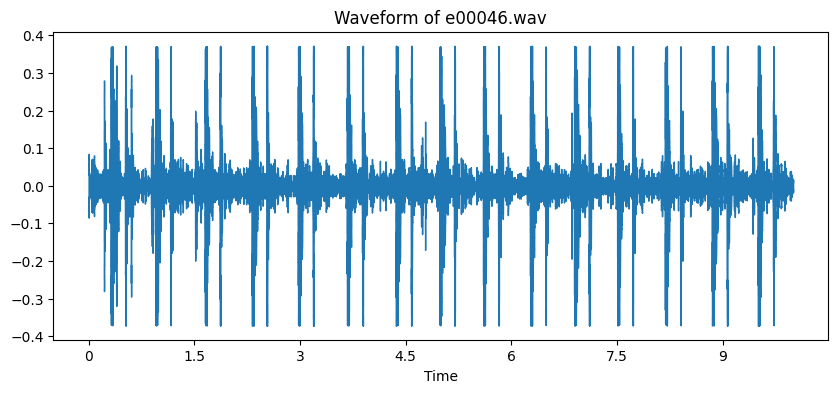

Processed and saved: /content/drive/MyDrive/processed_audio/e00046.wav
Processing file 143/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/e00047.wav


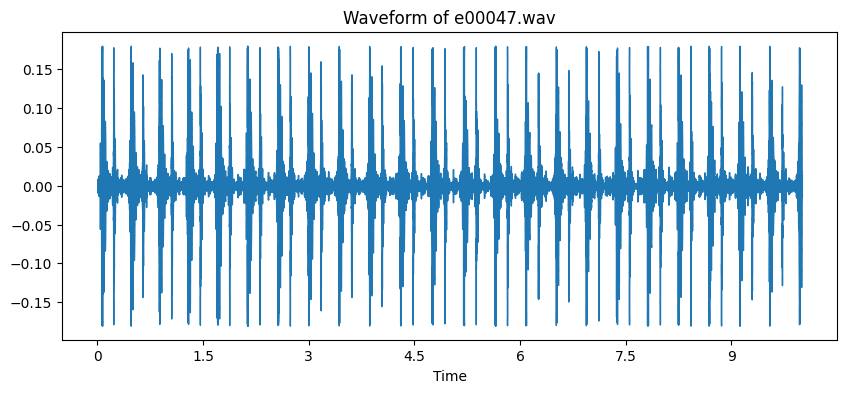

Processed and saved: /content/drive/MyDrive/processed_audio/e00047.wav
Processing file 144/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/e00049.wav


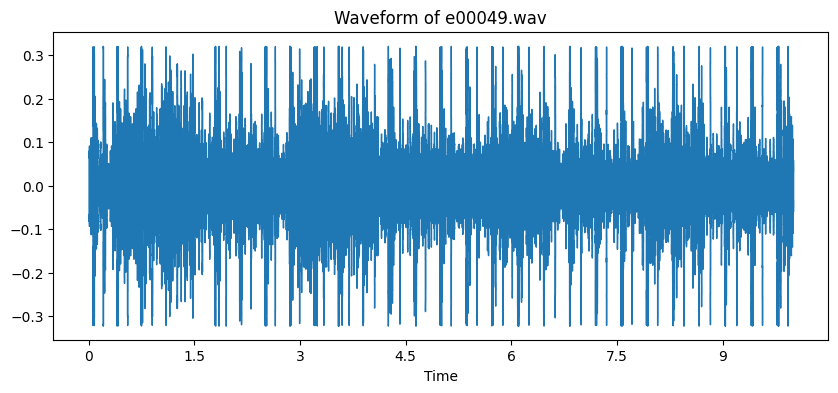

Processed and saved: /content/drive/MyDrive/processed_audio/e00049.wav
Processing file 145/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/e00050.wav


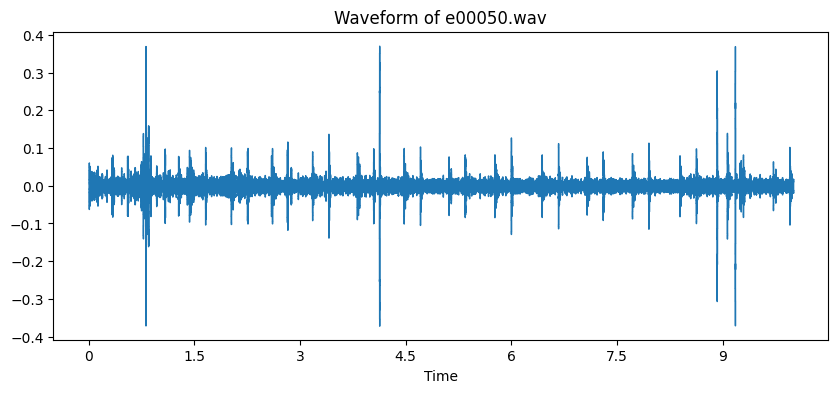

Processed and saved: /content/drive/MyDrive/processed_audio/e00050.wav
Processing file 146/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/e00051.wav


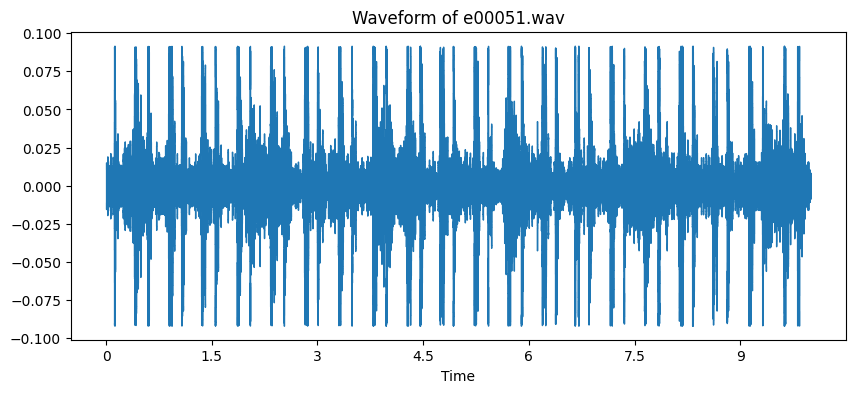

Processed and saved: /content/drive/MyDrive/processed_audio/e00051.wav
Processing file 147/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/e00052.wav


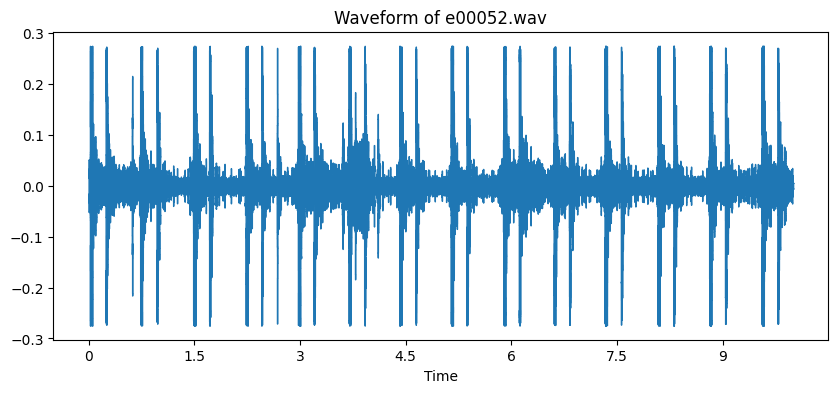

Processed and saved: /content/drive/MyDrive/processed_audio/e00052.wav
Processing file 148/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/e00053.wav


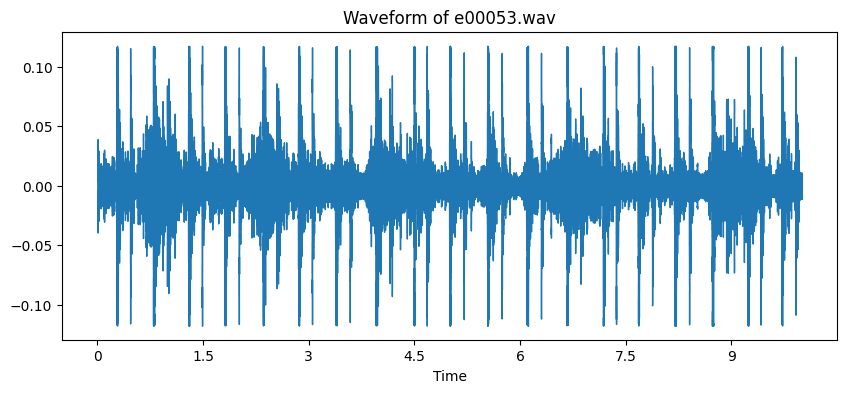

Processed and saved: /content/drive/MyDrive/processed_audio/e00053.wav
Processing file 149/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/e00054.wav


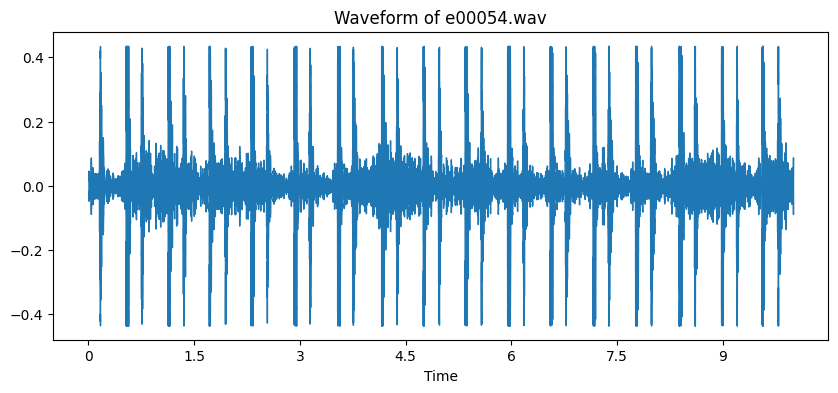

Processed and saved: /content/drive/MyDrive/processed_audio/e00054.wav
Processing file 150/150: /content/drive/MyDrive/healthy VAL_extracted/healthy/e00055.wav


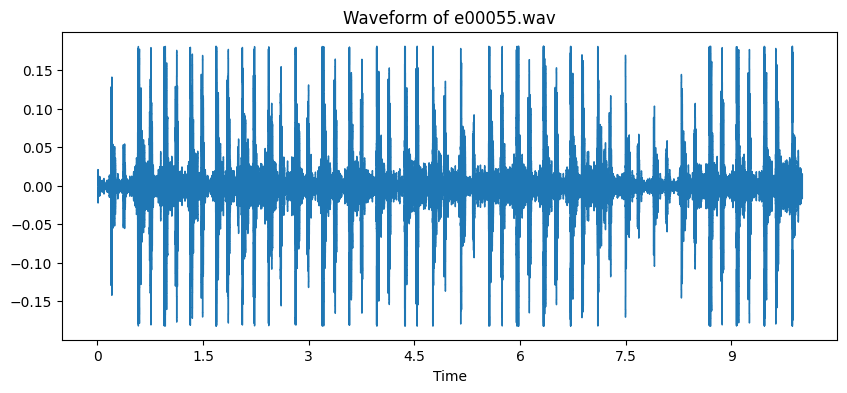

Processed and saved: /content/drive/MyDrive/processed_audio/e00055.wav
All files have been processed.


In [ ]:
output_folder = '/content/drive/MyDrive/processed_audio'

# Make sure the output folder exists
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Process each audio file automatically
for i, audio_file in enumerate(audio_files):
    print(f"Processing file {i+1}/{len(audio_files)}: {audio_file}")
    preprocess_audio(audio_file, output_folder)

print("All files have been processed.")